In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(purrr))
suppressMessages(library(readr))
suppressMessages(library(patchwork))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(ggrepel))
suppressMessages(library(rhdf5))
suppressMessages(library(chromVARmotifs))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject_CD8", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
# 把效应T筛选出来进行细分
teff_cells <- getCellNames(ArchRProj = proj)[proj$CD8Type=="Teff"]
proj_sub <- proj[teff_cells,]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [5]:
proj_sub <- addImputeWeights(proj_sub)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-29a4d7b442194-Date-2025-04-20_Time-10-08-33.910083.log
If there is an issue, please report to github with logFile!

2025-04-20 10:08:34.520898 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)



In [6]:
proj_sub <- addHarmony(
    ArchRProj = proj_sub,
    reducedDims = "Harmony_CD8",
    name = "Harmony_Teff",
    groupBy = "Sample",
    force = TRUE
)

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations



In [7]:
proj_sub <- addUMAP(
    ArchRProj = proj_sub,
    reducedDims = "Harmony_Teff",
    name = "UMAP_Teff",
    nNeighbors = 45,   # 默认是 15，可以尝试 30 或更大
    minDist = 0.05,     # 默认是 0.1，可以尝试 0.05 或更小
    metric = "cosine",  # 可以尝试不同的距离度量，如 "euclidean", "manhattan"
    force = TRUE
)

10:08:55 UMAP embedding parameters a = 1.75 b = 0.8421

10:08:55 Read 6169 rows and found 29 numeric columns

10:08:55 Using Annoy for neighbor search, n_neighbors = 45

10:08:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|



10:08:56 Writing NN index file to temp file /tmp/RtmpzSpupa/file29a4d759e7c2cb

10:08:56 Searching Annoy index using 48 threads, search_k = 4500

10:08:56 Annoy recall = 100%

10:08:58 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 45

10:08:59 Initializing from normalized Laplacian + noise (using RSpectra)

10:08:59 Commencing optimization for 500 epochs, with 426768 positive edges

10:08:59 Using rng type: pcg

10:09:12 Optimization finished

10:09:12 Creating temp model dir /tmp/RtmpzSpupa/dir29a4d724f27c3a

10:09:12 Creating dir /tmp/RtmpzSpupa/dir29a4d724f27c3a

10:09:13 Changing to /tmp/RtmpzSpupa/dir29a4d724f27c3a

10:09:13 Creating /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_CD8/Embeddings/Save-Uwot-UMAP-Params-Harmony_Teff-29a4d7657a9e4b-Date-2025-04-20_Time-10-09-12.410458.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d7465ca2c8-Date-2025-04-20_Time-10-09-13.833821.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d7465ca2c8-Date-2025-04-20_Time-10-09-13.833821.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d7623ab721-Date-2025-04-20_Time-10-09-14.456472.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 




ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d7623ab721-Date-2025-04-20_Time-10-09-14.456472.log



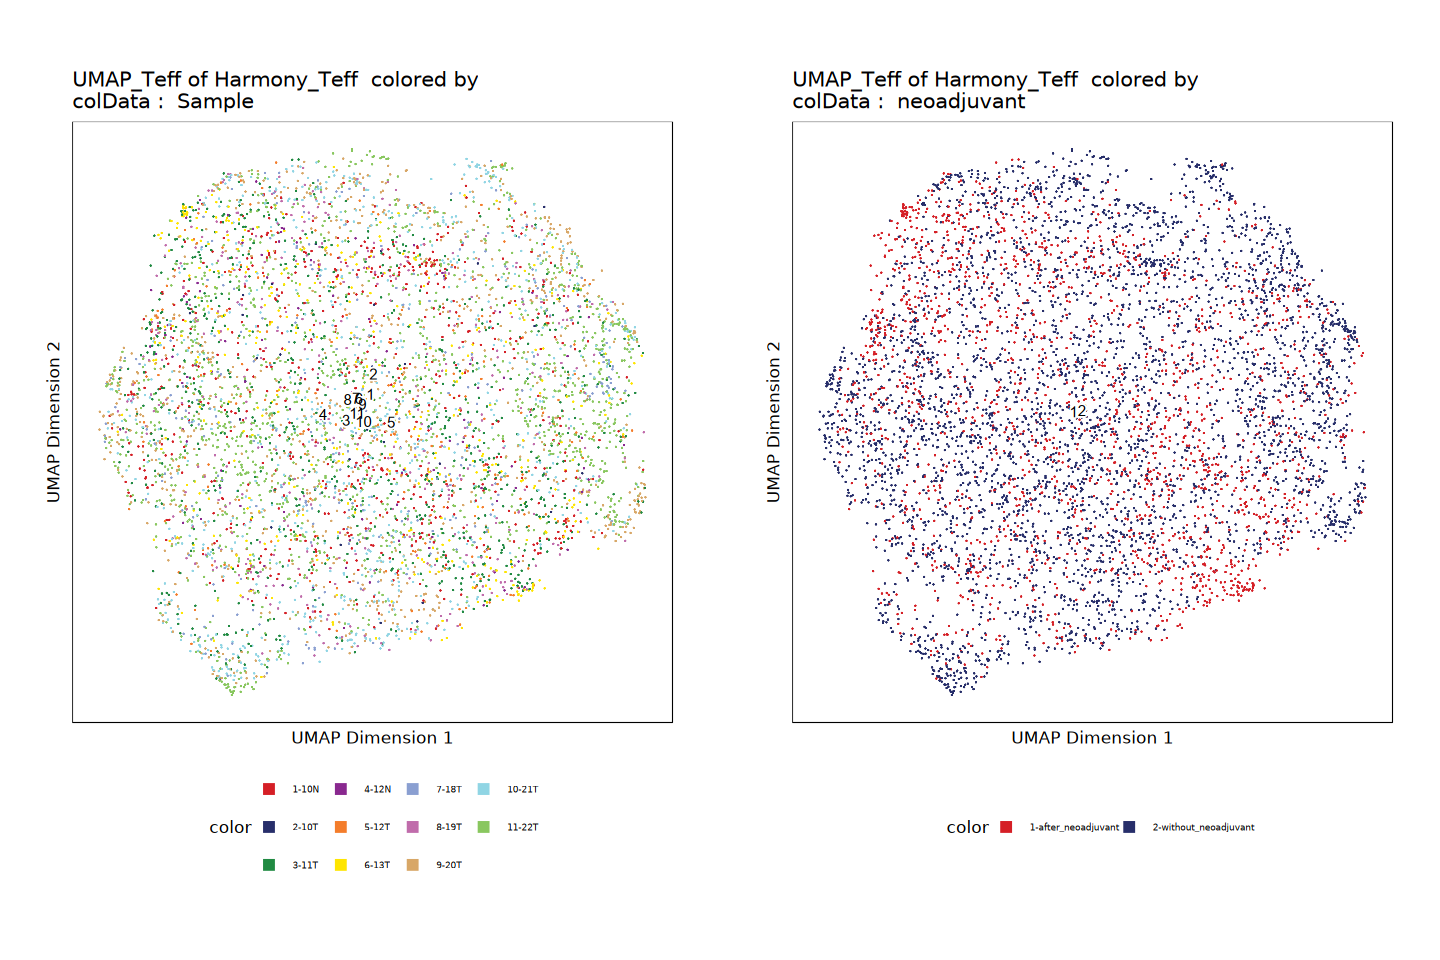

In [8]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_Teff"
    )
p2 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "neoadjuvant", 
    embedding = "UMAP_Teff"
    )
ggAlignPlots(p1, p2, type = "h")

In [9]:
proj_sub <- addClusters(proj_sub, name = "clusters_Teff", resolution = 1.0, force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addClusters-29a4d7649941b7-Date-2025-04-20_Time-10-09-20.948103.log
If there is an issue, please report to github with logFile!

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-04-20 10:09:21.383307 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.005 mins elapsed.

Computing nearest neighbor graph



Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6169
Number of edges: 216247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7763
Number of communities: 9
Elapsed time: 0 seconds


2025-04-20 10:09:31.882081 : Testing Outlier Clusters, 0.18 mins elapsed.

2025-04-20 10:09:31.887824 : Assigning Cluster Names to 9 Clusters, 0.18 mins elapsed.

2025-04-20 10:09:31.99247 : Finished addClusters, 0.182 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d717c82b06-Date-2025-04-20_Time-10-09-32.023982.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d717c82b06-Date-2025-04-20_Time-10-09-32.023982.log



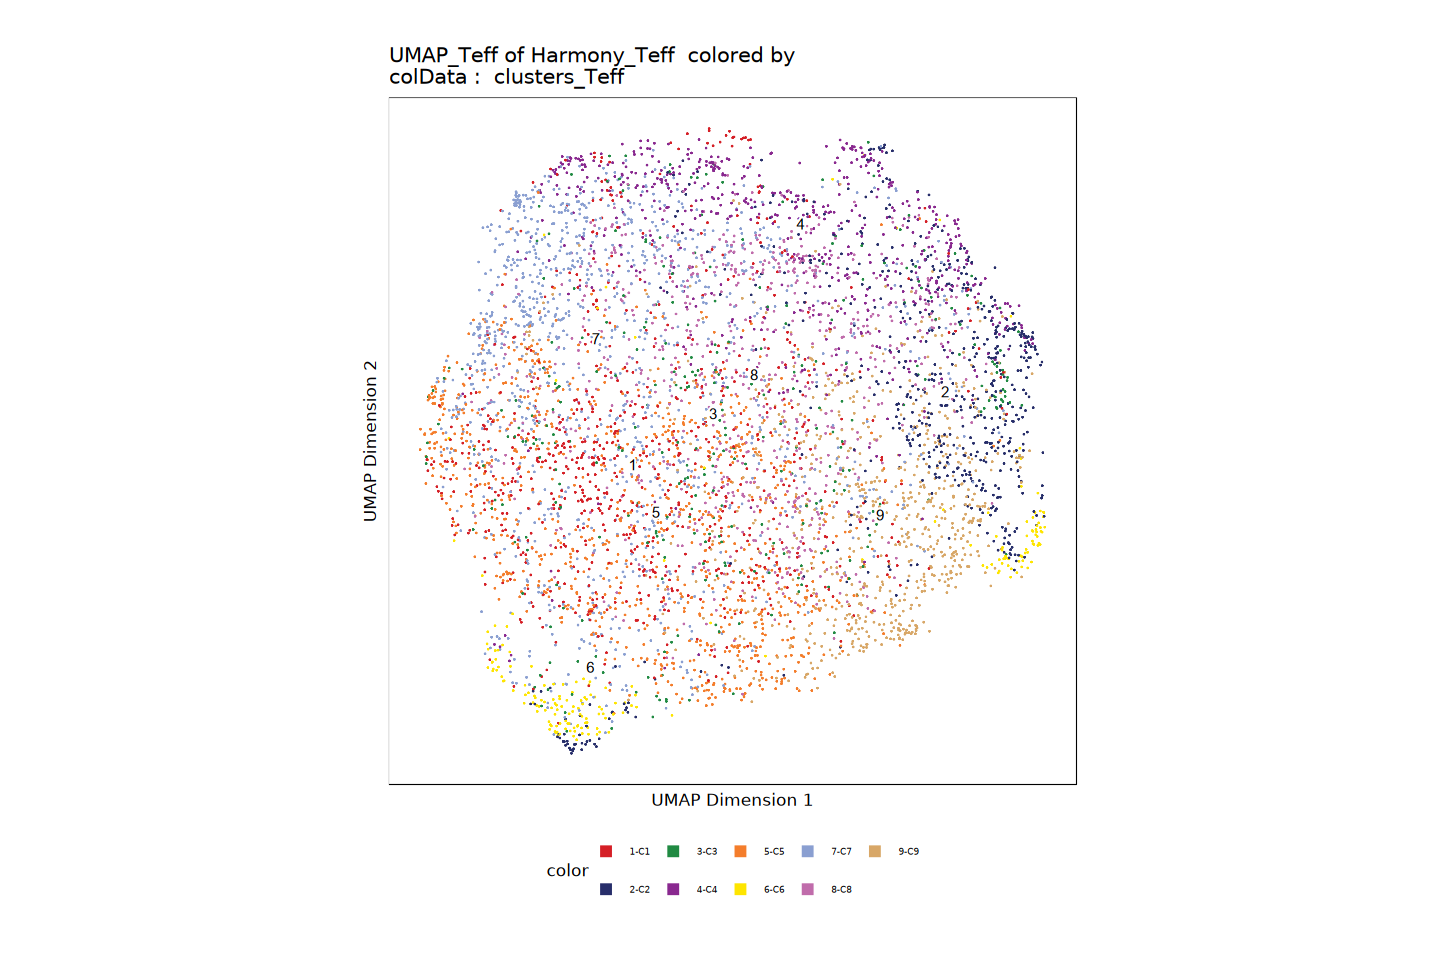

In [10]:
p3 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "clusters_Teff", 
    embedding = "UMAP_Teff"
    )
p3

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d73fb37bab-Date-2025-04-20_Time-10-09-35.274284.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-20 10:09:35.677361 : 



R_zmq_msg_send errno: 4 strerror: Interrupted system call




Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d73fb37bab-Date-2025-04-20_Time-10-09-35.274284.log

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


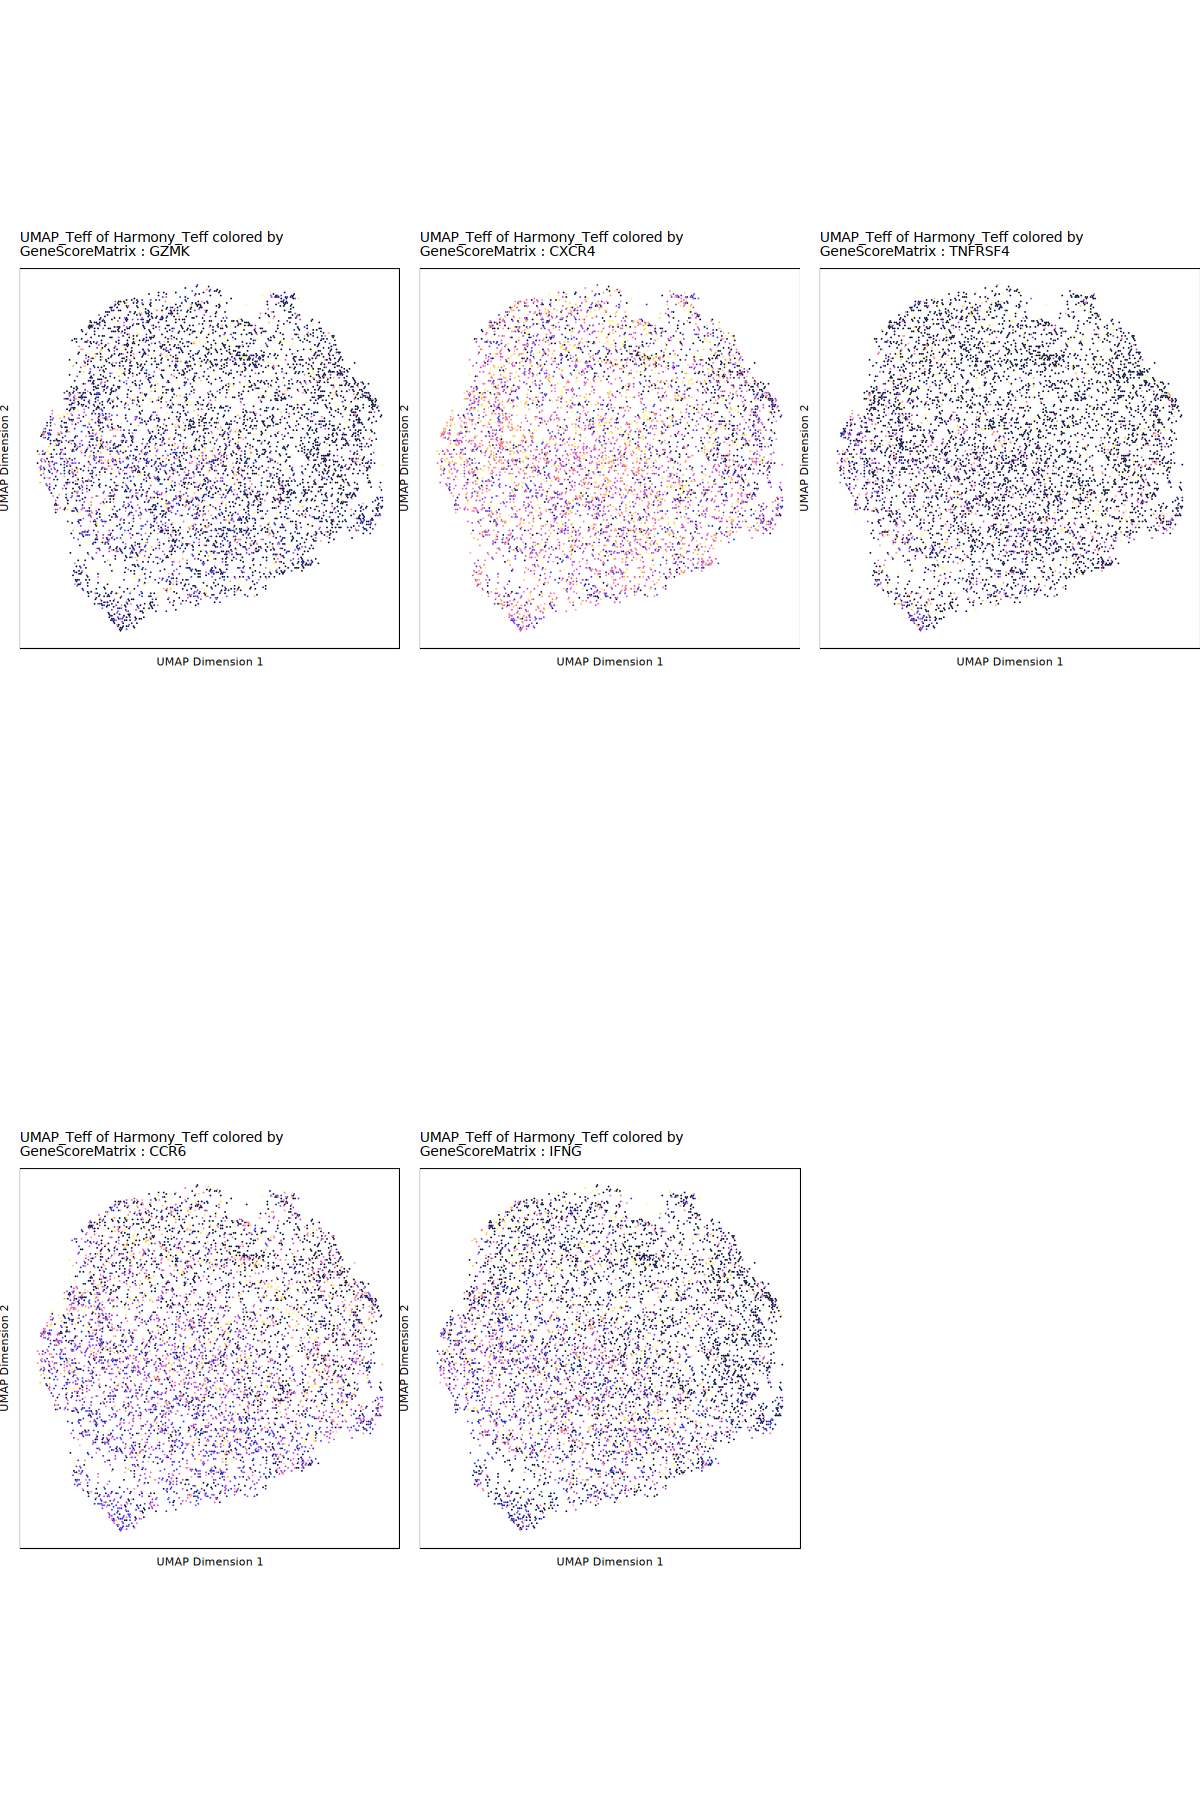

In [11]:
# 效应记忆T TEM
markerGenes <- c(
  "GZMK", "CXCR4", "TNFRSF4", "CCR6", "IFNG"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Teff",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d7119b86eb-Date-2025-04-20_Time-10-09-53.934661.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-20 10:09:54.2906 : 



Imputing Matrix

Using weights on disk

1 of 1

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d7119b86eb-Date-2025-04-20_Time-10-09-53.934661.log



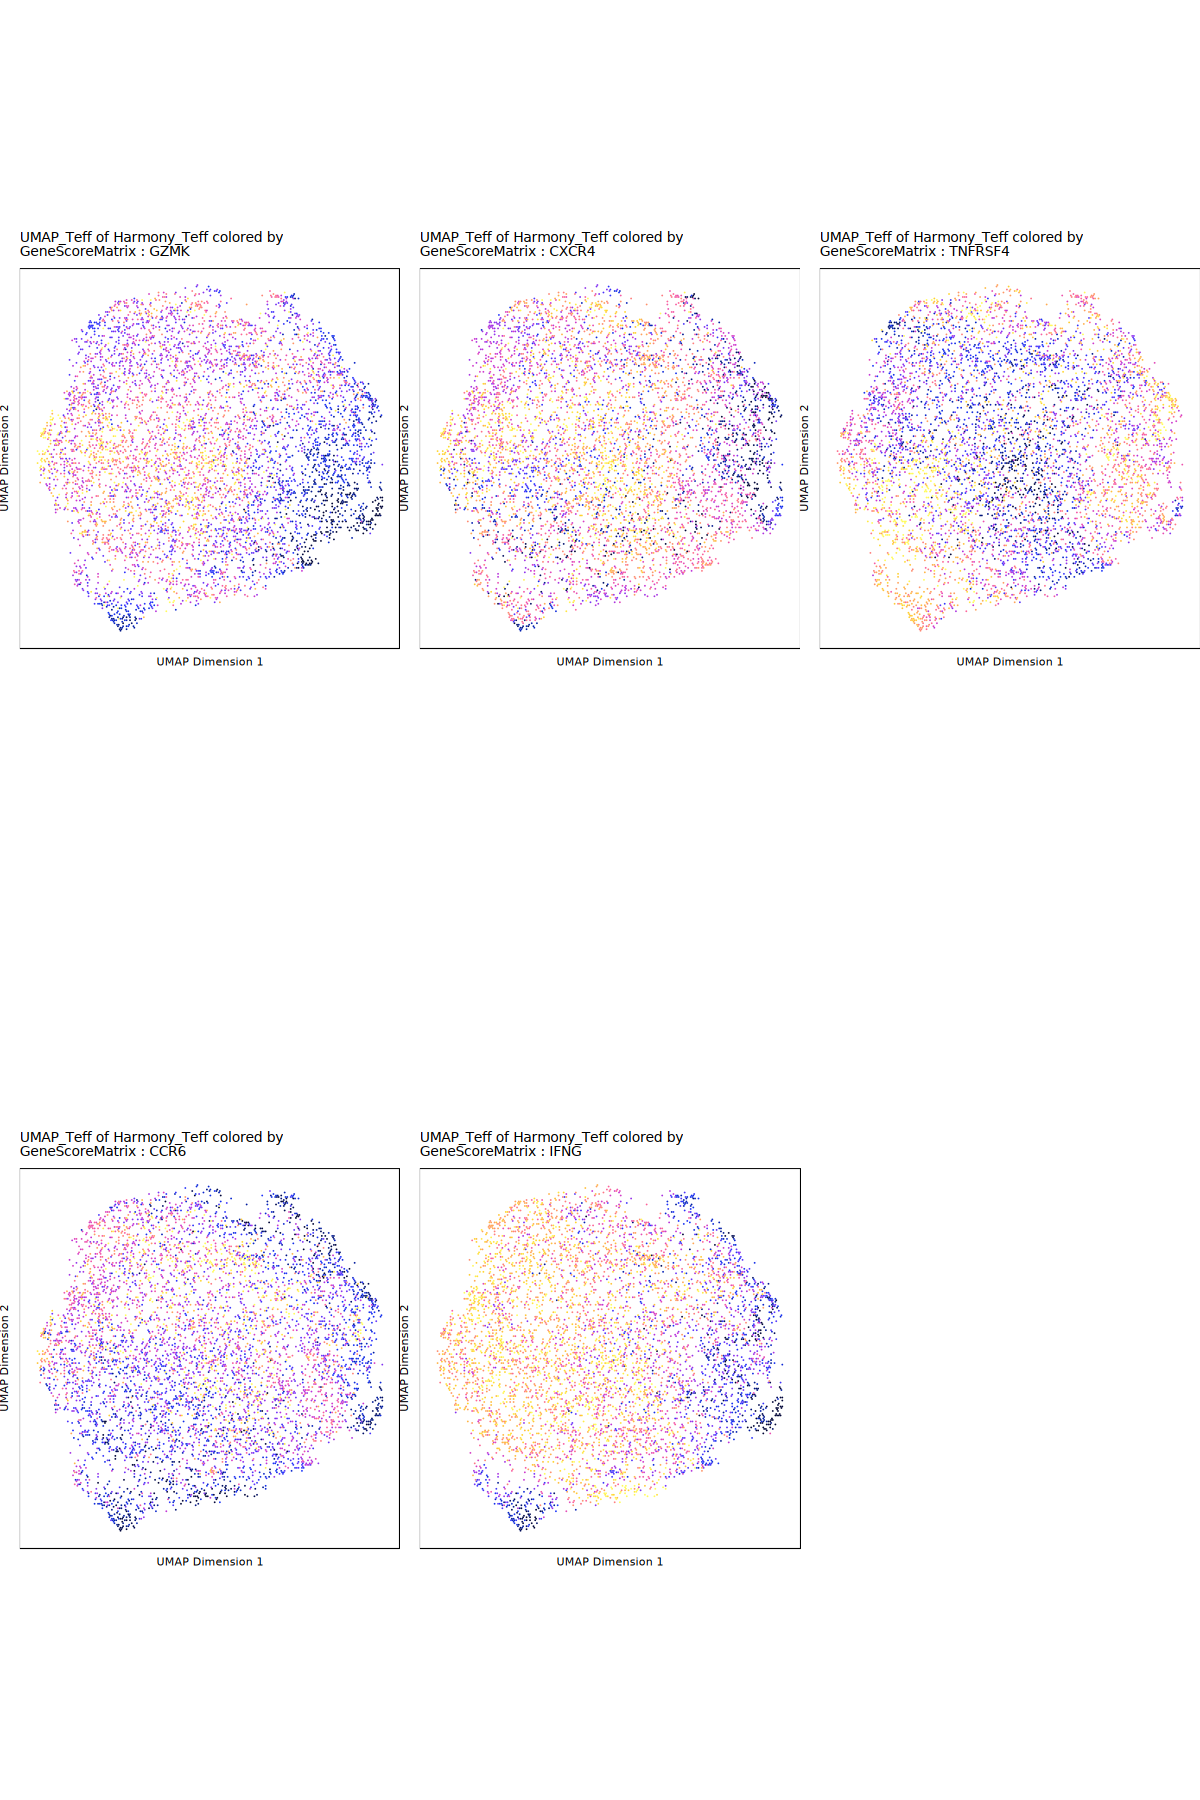

In [12]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Teff",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj_sub)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d72574edb2-Date-2025-04-20_Time-10-10-15.474787.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-20 10:10:15.853141 : 



R_zmq_msg_send errno: 4 strerror: Interrupted system call




Plotting Embedding

1 
2 
3 
4 
5 
6 
7 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d72574edb2-Date-2025-04-20_Time-10-10-15.474787.log



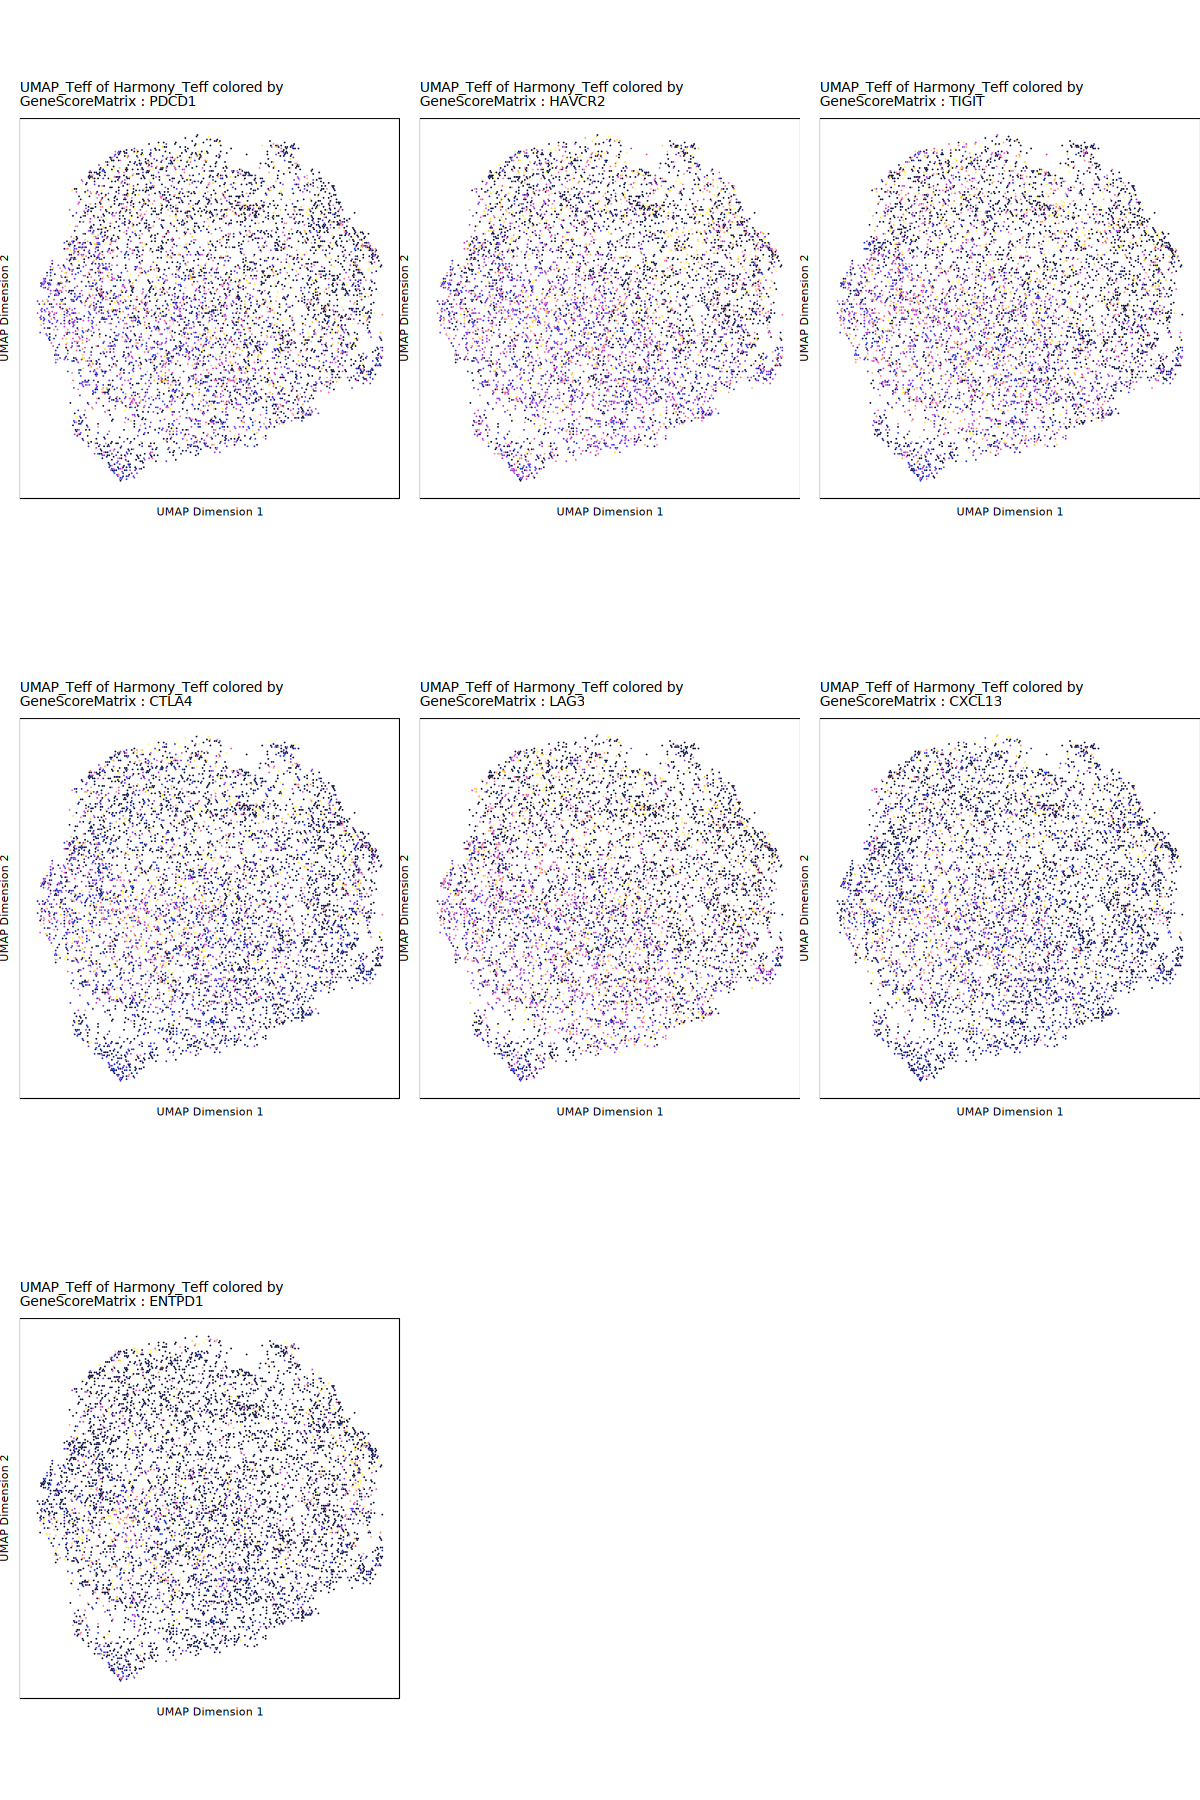

In [13]:
# 耗竭T Tex
markerGenes <- c(
 "PDCD1","HAVCR2", "TIGIT", "CTLA4", "LAG3", "CXCL13", "ENTPD1"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Teff",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d778939586-Date-2025-04-20_Time-10-10-37.911783.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-20 10:10:38.331435 : 



R_zmq_msg_send errno: 4 strerror: Interrupted system call




Imputing Matrix

Using weights on disk

1 of 1

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d778939586-Date-2025-04-20_Time-10-10-37.911783.log



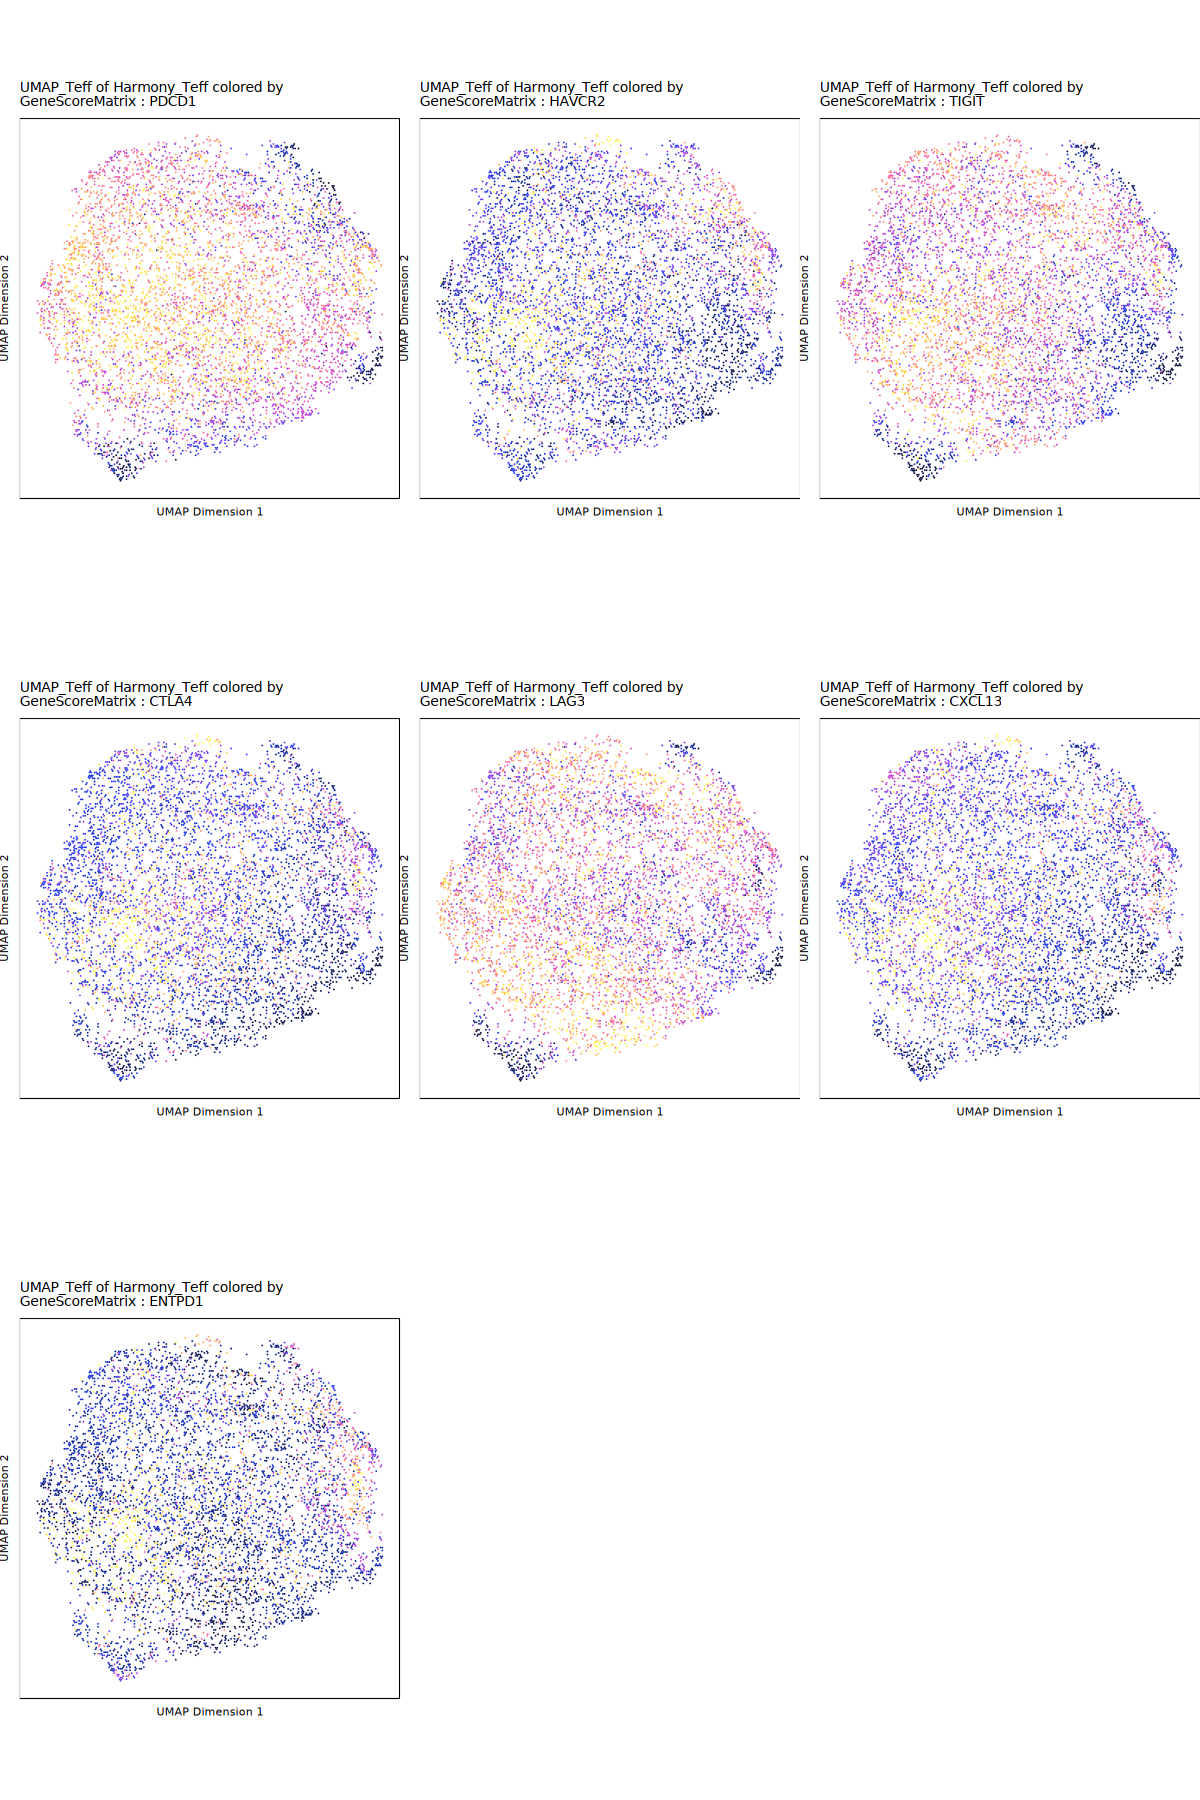

In [14]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Teff",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj_sub)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d76c6647e1-Date-2025-04-20_Time-10-10-56.995681.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-20 10:10:57.405755 : 



Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d76c6647e1-Date-2025-04-20_Time-10-10-56.995681.log



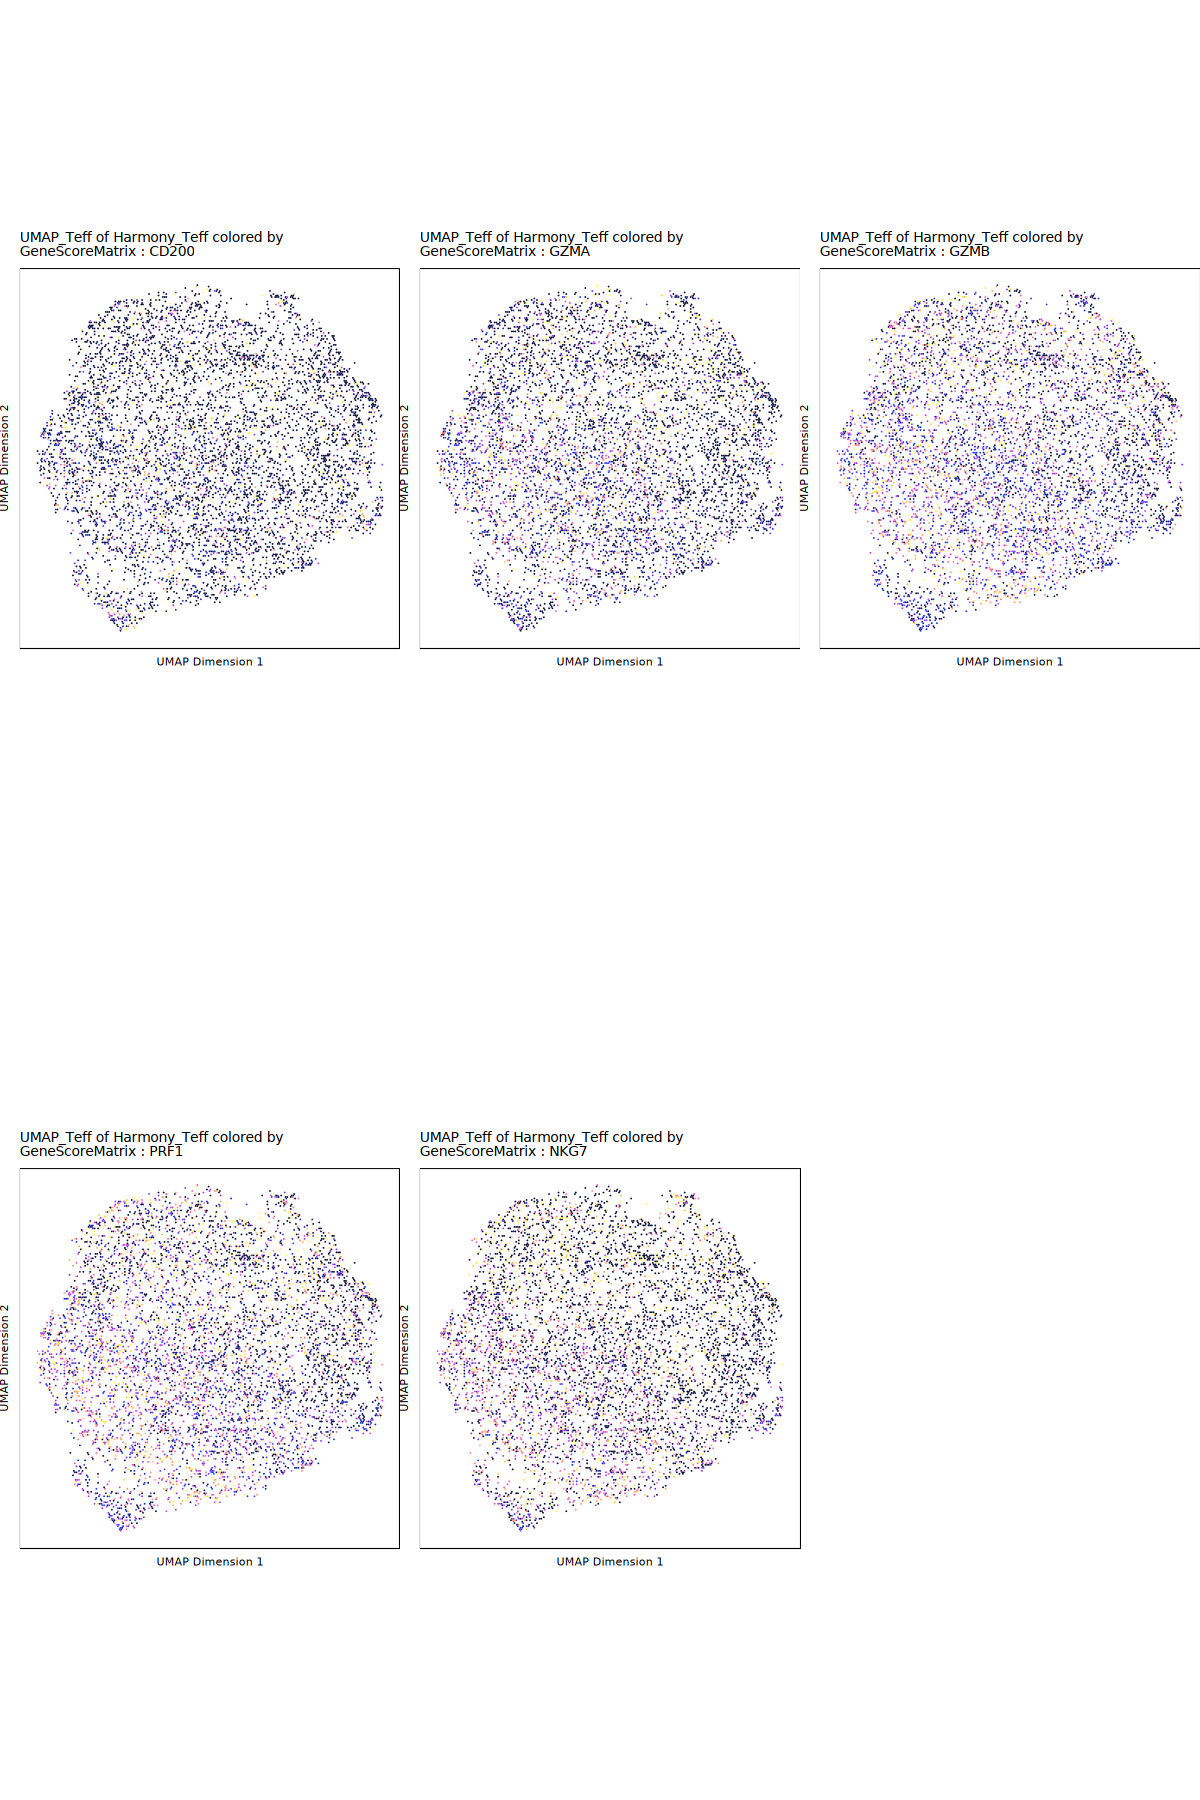

In [15]:
# 终末T tTEX
markerGenes <- c(
  "CD200", "GZMA", "GZMB", "PRF1", "NKG7"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Teff",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d7482edb44-Date-2025-04-20_Time-10-11-08.468667.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-20 10:11:08.868458 : 



Imputing Matrix

Using weights on disk

1 of 1

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d7482edb44-Date-2025-04-20_Time-10-11-08.468667.log



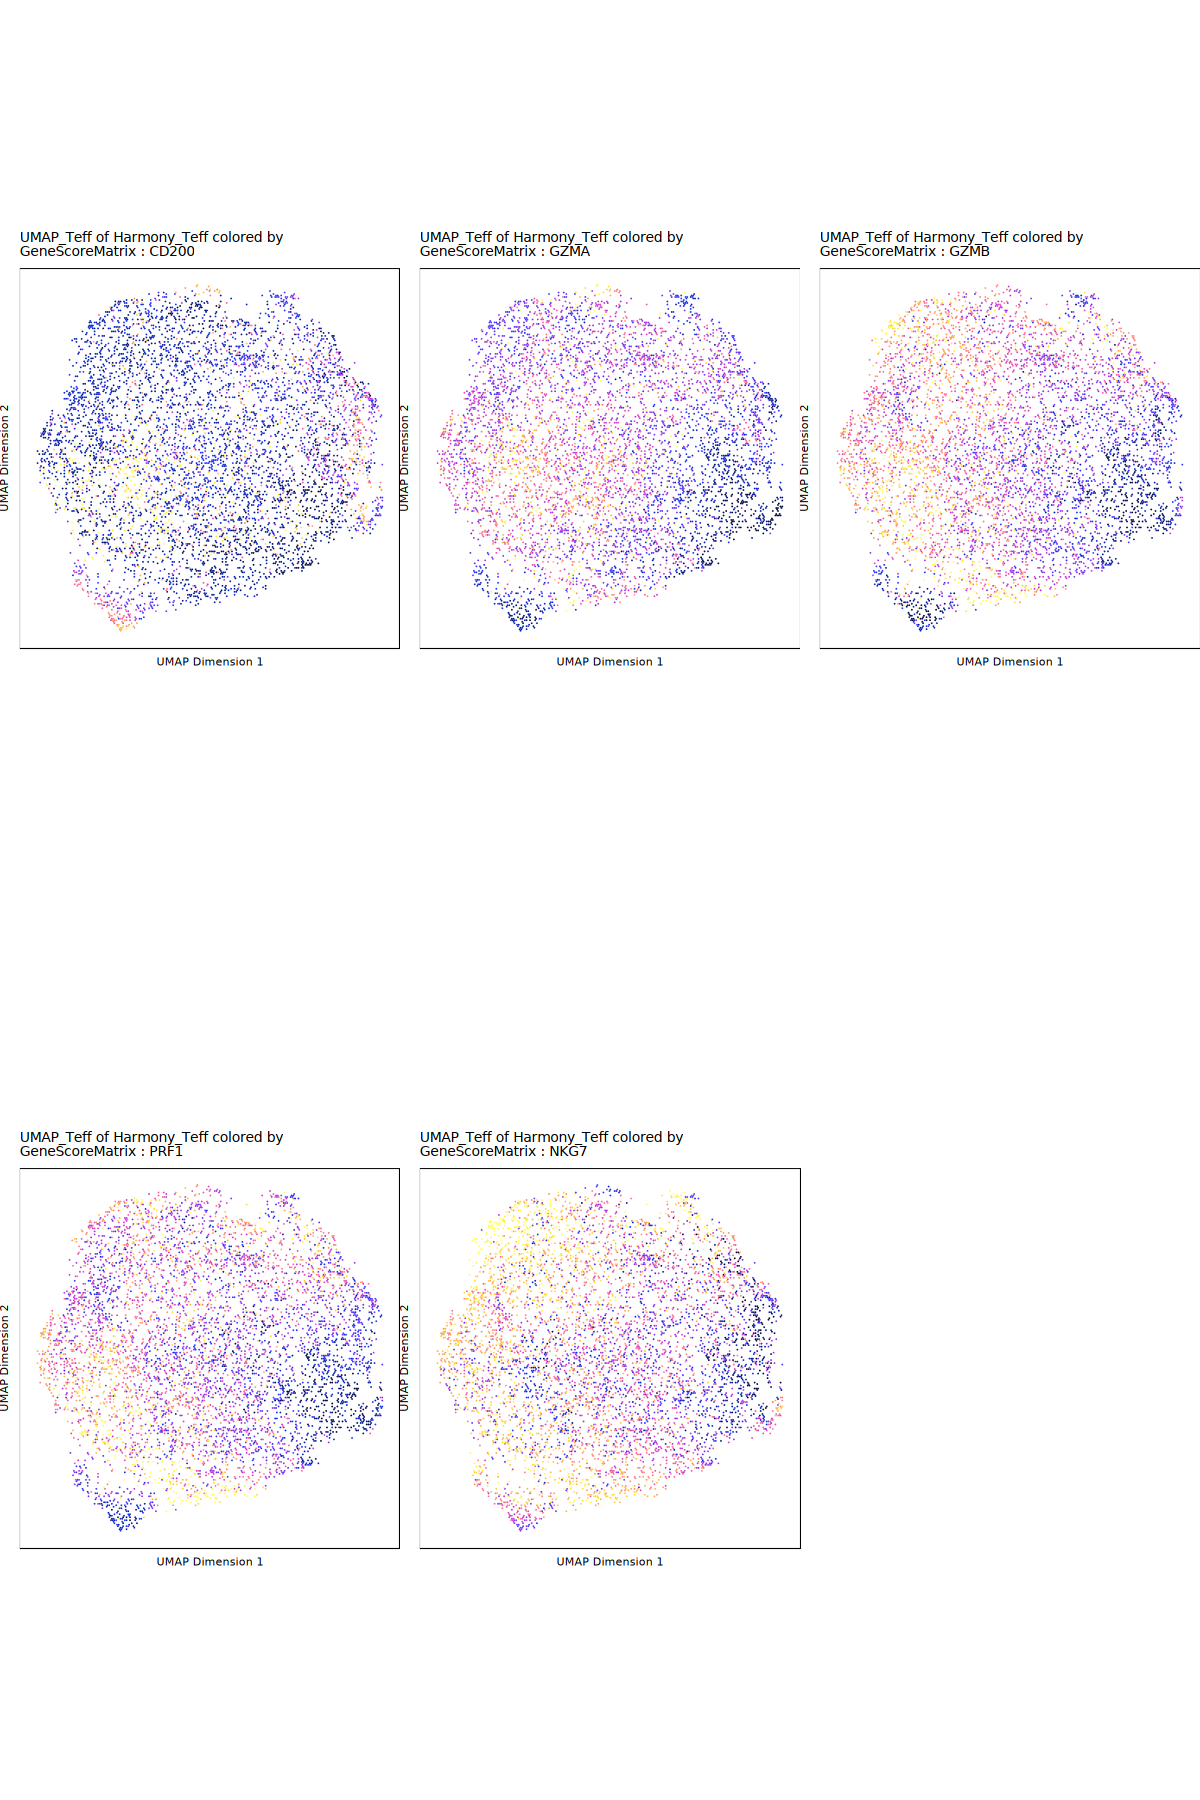

In [16]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Teff",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj_sub)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [17]:
# markersGS <- getMarkerFeatures(
#     ArchRProj = proj_sub,
#     useMatrix = "GeneScoreMatrix",
#     groupBy = "clusters_Teff",
#     bias = c("TSSEnrichment", "log10(nFrags)"),
#     testMethod = "wilcoxon"
#     )

In [18]:
# saveRDS(markersGS, )

In [19]:
markersGS <- readRDS(file = "./ArchRProject_CD8/markersGS_TeffCluster.rds")

In [20]:
# markerPK <- getMarkerFeatures(
#     ArchRProj = proj_sub,
#     useMatrix = "PeakMatrix", 
#     groupBy = "clusters_Teff",
#     bias = c("TSSEnrichment", "log10(nFrags)"),
#     testMethod = "wilcoxon"
# )

In [21]:
# saveRDS(markerPK, file = "./ArchRProject_CD8/markersPK_TeffCluster.rds")

In [22]:
markerPK <- readRDS(file = "./ArchRProject_CD8/markersPK_TeffCluster.rds")

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-29a4d7353b4eec-Date-2025-04-20_Time-10-11-37.465261.log
If there is an issue, please report to github with logFile!



Printing Top Marker Genes:

C1:

	AADACL3, PRAMEF19, LINC01389, FAM151A, DAB1-AS1, ROR1-AS1, MIR1262, DEPDC1-AS1, LCE3A, OR6K3, OR6K6, RGS4, MIR1295A, PDC, AVPR1B

C2:

	GJB4, CD1D, PRG4, PTGS2, PACERR, CHRM3-AS1, TRIM58, C10orf53, DKK1, LOC102724589, MIR4484, OR52K1, MTNR1B, MMP1, LOC101928847

C3:

	FAM229A, LINC01358, FCGR3B, FCGR2B, LOC101927964, FAM170B-AS1, FAM170B, TMEM273, IFITM10, LOC101928132, SMTNL1, LGALS12, CORO1B, CABP4, GPR152

C4:

	TSSK4, HOXA7, GTF2IRD2, FAM87B, MIR429, AADACL3, PRAMEF19, LDLRAD2, CNR2, MIR5585, FAM229A, GJB4, RIMKLA, LINC01389, BEND5

C5:

	MIR194-1, LINC00552, MIR4504, MIR6786, KIR2DL3, FAM87B, MIR429, AADACL3, PRAMEF19, LDLRAD2, CNR2, MIR5585, FAM229A, GJB4, RIMKLA

C6:

	MIR429, LDLRAD2, CNR2, RIMKLA, BEND5, CNN3, FCRL3, FCRL2, LINC01704, MIR4654, MIR4424, RALGPS2, GOLT1A, CTSE, PTPN14

C7:

	LINC02405, FAM87B, MIR429, AADACL3, PRAMEF19, LDLRAD2, CNR2, MIR5585, FAM229A, GJB4, RIMKLA, LINC01389, BEND5, FAM151A, DAB1-AS1

C8:

	FAM87B, LINC00624, CD

 [1] "GZMK"    "CXCR4"   "TNFRSF4" "CCR6"    "IFNG"    "PDCD1"   "HAVCR2" 
 [8] "TIGIT"   "CTLA4"   "LAG3"    "CXCL13"  "ENTPD1"  "CD200"   "GZMA"   
[15] "GZMB"    "PRF1"    "NKG7"    "GZMH"    "GZML"   


Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-29a4d7353b4eec-Date-2025-04-20_Time-10-11-37.465261.log



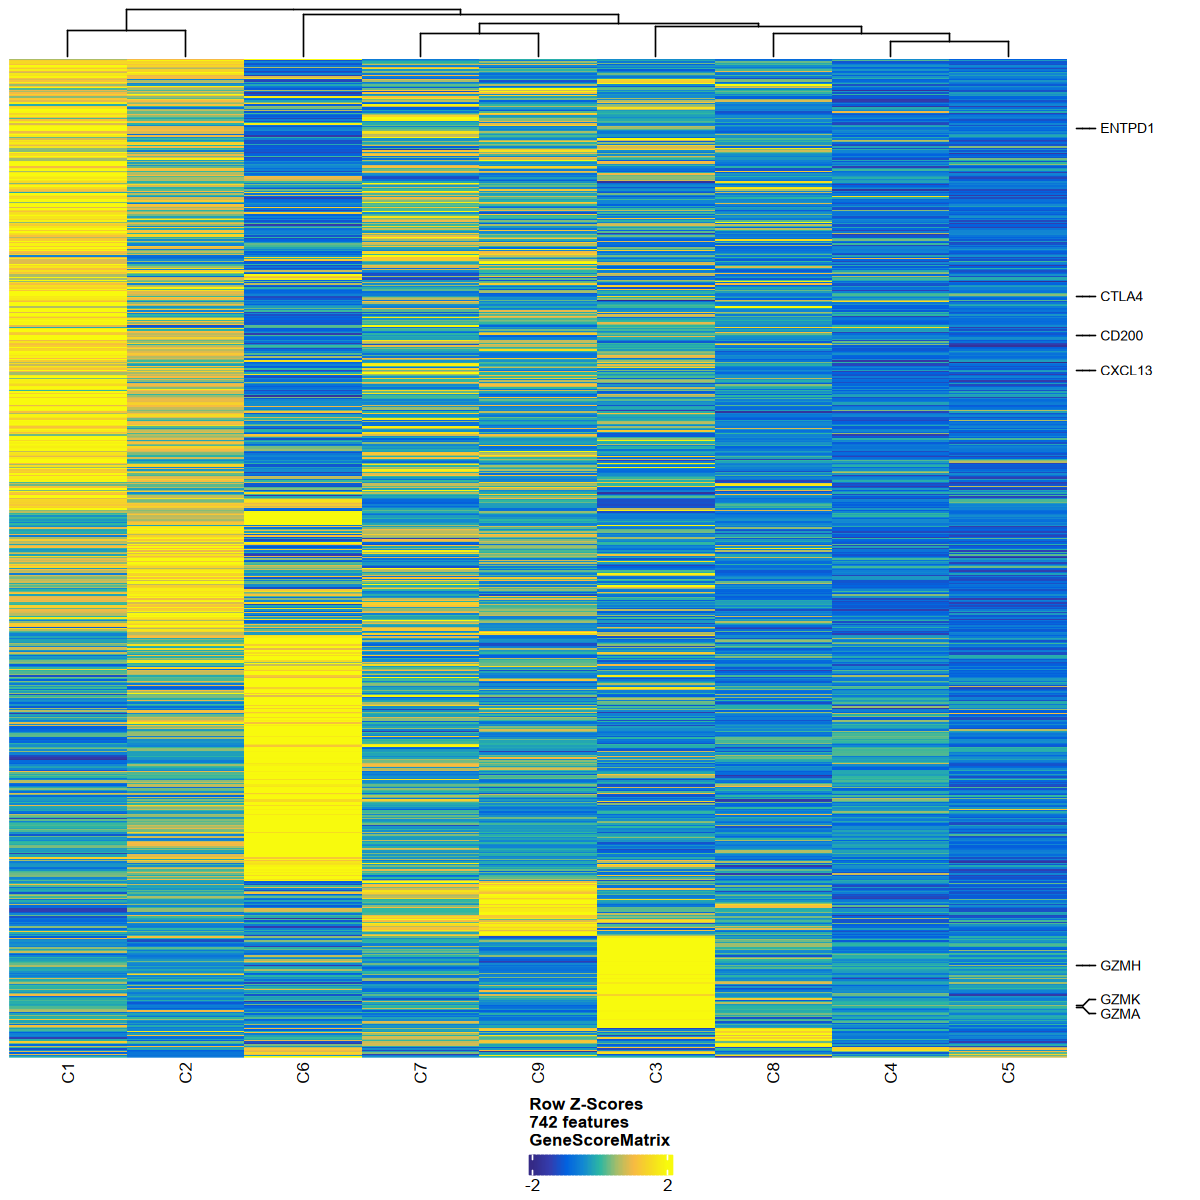

In [23]:
markerGenes <- c(
    "GZMK", "CXCR4", "TNFRSF4", "CCR6", "IFNG", # 效应记忆
    "PDCD1","HAVCR2", "TIGIT", "CTLA4", "LAG3", "CXCL13", "ENTPD1", # 耗竭
    "CD200", "GZMA", "GZMB", "PRF1", "NKG7", # 终末耗竭
    "GZMH", "GZML"
)

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 1.25", 
  labelMarkers = markerGenes
)

options(repr.plot.height = 10, repr.plot.width = 10)
ComplexHeatmap::draw(heatmapGS, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

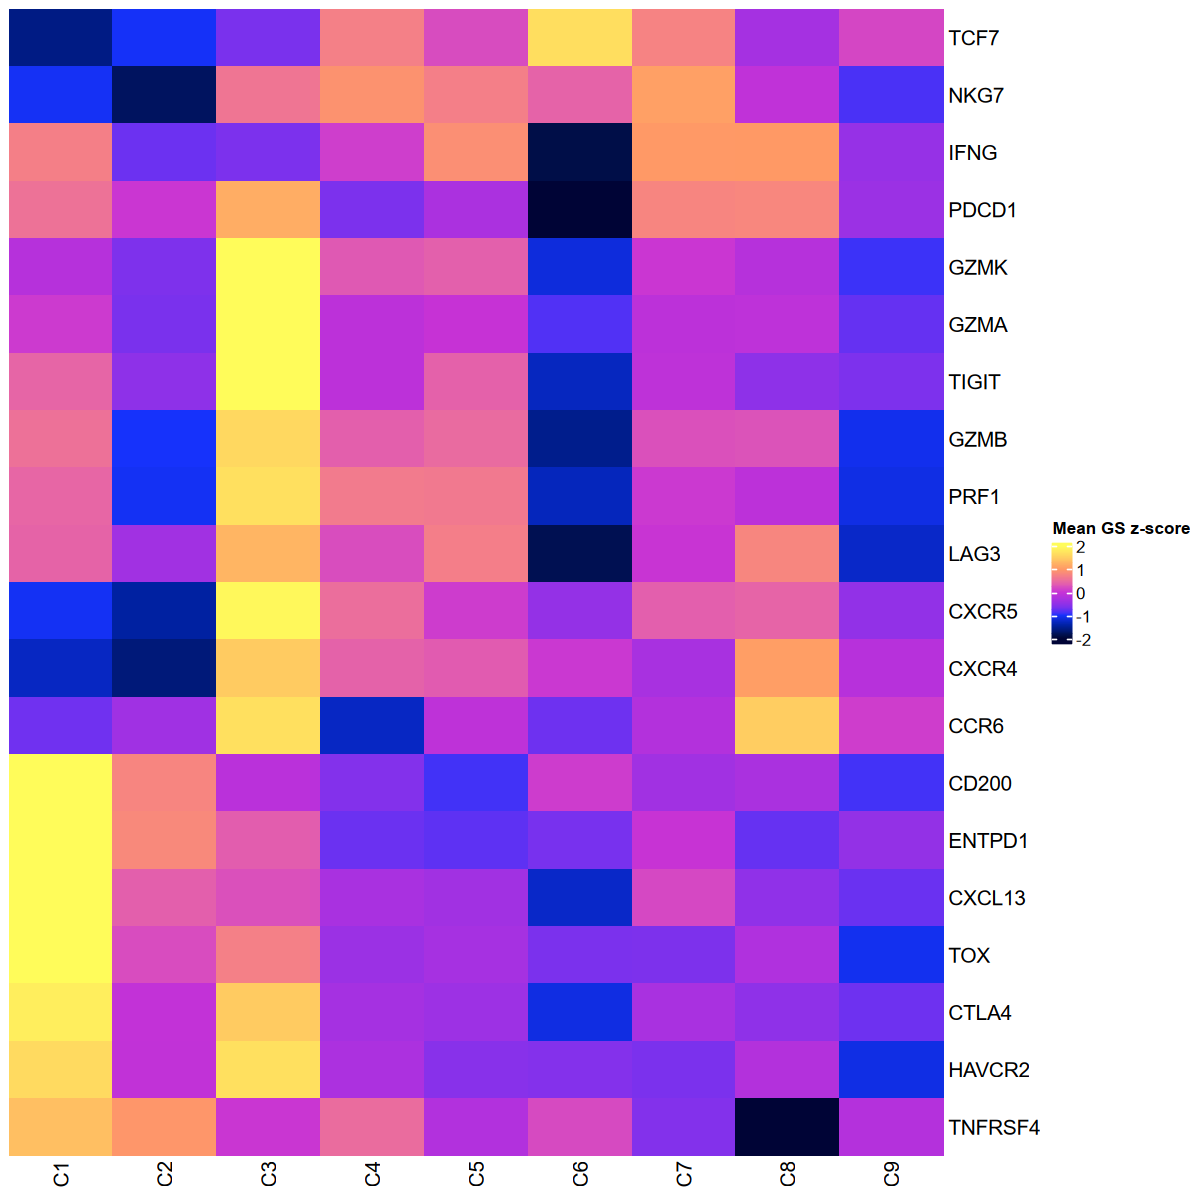

In [24]:
markerGenes <- c(
    "GZMK", "CXCR4", "TNFRSF4", "CCR6", "IFNG", # 效应记忆
    "PDCD1","HAVCR2", "TIGIT", "CTLA4", "LAG3", "CXCL13", "ENTPD1", "TOX", # 耗竭
    "CD200", "GZMA", "GZMB", "PRF1", "NKG7", # 终末耗竭
    "TCF7", "CXCR5", "CD62L", "ILR7"
)

idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数de
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))
options(repr.plot.width = 10, repr.plot.height = 10)
ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
p3 <- draw(ht1)
p3

In [25]:
mtx

C1          C2          C3          C4          C5          
TNFRSF4  1.37654472  0.96201183  0.02912537  0.51869567 -0.202771291
PRF1     0.45163188 -1.03110824  1.71288618  0.67311744  0.654926273
ENTPD1   2.19527968  0.82015576  0.37044092 -0.72922362 -0.794706700
CXCR5   -1.03386687 -1.42588042  1.96105852  0.53372691  0.075712288
LAG3     0.42932642 -0.35173649  1.26966656  0.21367355  0.708208413
IFNG     0.71837233 -0.72383095 -0.62440661  0.08586224  0.884002580
GZMB     0.56914821 -1.00219779  1.63002826  0.38308959  0.501487594
NKG7    -1.02595441 -1.76452571  0.61249957  0.92339577  0.710709739
CXCR4   -1.26713022 -1.63003973  1.49903929  0.41078512  0.347652274
CTLA4    1.85370161 -0.04558267  1.49623833 -0.31707337 -0.385991308
PDCD1    0.57739545  0.03188799  1.19131009 -0.62359296 -0.262954543
CD200    2.28130397  0.77868934 -0.12479530 -0.57710105 -0.906923440
TIGIT    0.44020972 -0.50382448  2.25639975 -0.10979998  0.406869765
CXCL13   2.29259759  0.38285161  0.24612687 -0.28086200 -0.354144992
GZMK    -0.16776122 -0.61184656  2.26807224  0.32406682  0.390927277
GZMA     0.05838275 -0.63532715  2.50215995 -0.10629685 -0.009060536
TCF7    -1.56942755 -1.01405521 -0.63504416  0.72316571  0.209535997
HAVCR2   1.64907868 -0.05881308  1.71149010 -0.25447016 -0.547469091
CCR6    -0.69707459 -0.36167506  1.71357622 -1.26229660 -0.089556478
TOX      2.28996652  0.21116641  0.72328644 -0.39632083 -0.304846161
        C6          C7          C8          C9         
TNFRSF4  0.18740681 -0.57724425 -2.11374227 -0.18002659
PRF1    -1.29638415  0.04810624 -0.10757565 -1.10559997
ENTPD1  -0.65303573  0.00539011 -0.75512294 -0.45917748
CXCR5   -0.45740611  0.38064994  0.43408187 -0.46807613
LAG3    -1.83930354  0.01586309  0.78959336 -1.23529136
IFNG    -1.89630961  0.99494412  1.00103830 -0.43967241
GZMB    -1.53191260  0.24682634  0.26943613 -1.06590574
NKG7     0.42175888  1.07032821 -0.06919450 -0.87901755
CXCR4    0.04080129 -0.29425246  1.04386756 -0.15072312
CTLA4   -1.11522699 -0.27906238 -0.49528152 -0.71172170
PDCD1   -2.09211022  0.77816700  0.80241714 -0.40251995
CD200    0.07388030 -0.35162120 -0.27001641 -0.90341622
TIGIT   -1.28090108 -0.08905236 -0.49786190 -0.62203944
CXCL13  -1.23513183  0.17108005 -0.48787493 -0.73464236
GZMK    -1.14492308  0.03019817 -0.16287401 -0.92585964
GZMA    -0.85209960 -0.10628676 -0.09340129 -0.75807052
TCF7     1.68564641  0.75677093 -0.31501059  0.15841847
HAVCR2  -0.57338684 -0.63319270 -0.18974409 -1.10349282
CCR6    -0.71157501 -0.18795011  1.51569091  0.08086072
TOX     -0.62951417 -0.61567957 -0.22294578 -1.05511287

In [26]:
markerGenes <- c(
    "GZMK", "CXCR4", "TNFRSF4", "CCR6", "IFNG", # 效应记忆
    "PDCD1","HAVCR2", "TIGIT", "CTLA4", "LAG3", "CXCL13", "ENTPD1", "TOX", # 耗竭
    "CD200", "GZMA", "GZMB", "PRF1", "NKG7", # 终末耗竭
    "TCF1", "CXCR5", "CD62L", "ILR7"
)

p  <- plotBrowserTrack(
    ArchRProj = proj_sub,
    groupBy = "clusters_Teff",
    geneSymbol = markerGenes,
    upstream = 50000,
    downstream = 50000
    )
plotPDF(p, name = "Teffcluster_track",ArchRProj = proj_sub, addDOC = FALSE)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-29a4d742d9f3e9-Date-2025-04-20_Time-10-12-03.670056.log
If there is an issue, please report to github with logFile!

2025-04-20 10:12:03.821994 : Validating Region, 0.003 mins elapsed.



GRanges object with 19 ranges and 2 metadata columns:
       seqnames              ranges strand |     gene_id      symbol
          <Rle>           <IRanges>  <Rle> | <character> <character>
   [1]     chr5   55024253-55034570      + |        3003        GZMK
   [2]     chr2 136114349-136118165      - |        7852       CXCR4
   [3]     chr1     1211326-1214138      - |        7293     TNFRSF4
   [4]     chr6 166999405-167139696      + |        1235        CCR6
   [5]    chr12   68154768-68159747      - |        3458        IFNG
   ...      ...                 ...    ... .         ...         ...
  [15]     chr5   55102648-55110252      + |        3001        GZMA
  [16]    chr14   24630954-24634267      - |        3002        GZMB
  [17]    chr10   70597348-70602775      - |        5551        PRF1
  [18]    chr19   51371606-51372715      - |        4818        NKG7
  [19]    chr11 118883766-118897799      + |         643       CXCR5
  -------
  seqinfo: 24 sequences from hg38 genom

2025-04-20 10:12:03.963867 : Adding Bulk Tracks (1 of 19), 0.005 mins elapsed.

2025-04-20 10:12:15.751199 : Adding Feature Tracks (1 of 19), 0.201 mins elapsed.

2025-04-20 10:12:15.883437 : Adding Gene Tracks (1 of 19), 0.204 mins elapsed.

2025-04-20 10:12:16.364432 : Plotting, 0.212 mins elapsed.

2025-04-20 10:12:17.80195 : Adding Bulk Tracks (2 of 19), 0.236 mins elapsed.

2025-04-20 10:12:32.927185 : Adding Feature Tracks (2 of 19), 0.488 mins elapsed.

2025-04-20 10:12:33.028615 : Adding Gene Tracks (2 of 19), 0.489 mins elapsed.

2025-04-20 10:12:33.41275 : Plotting, 0.496 mins elapsed.

2025-04-20 10:12:34.955645 : Adding Bulk Tracks (3 of 19), 0.521 mins elapsed.

2025-04-20 10:12:57.300001 : Adding Feature Tracks (3 of 19), 0.894 mins elapsed.

2025-04-20 10:12:57.403532 : Adding Gene Tracks (3 of 19), 0.896 mins elapsed.

2025-04-20 10:12:57.79305 : Plotting, 0.902 mins elapsed.

2025-04-20 10:12:59.810464 : Adding Bulk Tracks (4 of 19), 0.936 mins elapsed.

2025-04-20 10:

R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:14:56.88438 : Adding Feature Tracks (14 of 19), 2.887 mins elapsed.

2025-04-20 10:14:56.978953 : Adding Gene Tracks (14 of 19), 2.888 mins elapsed.

2025-04-20 10:14:57.425192 : Plotting, 2.896 mins elapsed.

2025-04-20 10:14:59.068343 : Adding Bulk Tracks (15 of 19), 2.923 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:15:01.638051 : Adding Feature Tracks (15 of 19), 2.966 mins elapsed.

2025-04-20 10:15:01.753953 : Adding Gene Tracks (15 of 19), 2.968 mins elapsed.

2025-04-20 10:15:02.183436 : Plotting, 2.975 mins elapsed.

2025-04-20 10:15:03.641219 : Adding Bulk Tracks (16 of 19), 3 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:15:14.252134 : Adding Feature Tracks (16 of 19), 3.176 mins elapsed.

2025-04-20 10:15:14.358441 : Adding Gene Tracks (16 of 19), 3.178 mins elapsed.

2025-04-20 10:15:14.742285 : Plotting, 3.185 mins elapsed.

2025-04-20 10:15:16.141486 : Adding Bulk Tracks (17 of 19), 3.208 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:15:18.799309 : Adding Feature Tracks (17 of 19), 3.252 mins elapsed.

2025-04-20 10:15:18.892244 : Adding Gene Tracks (17 of 19), 3.254 mins elapsed.

2025-04-20 10:15:19.374168 : Plotting, 3.262 mins elapsed.

2025-04-20 10:15:20.830278 : Adding Bulk Tracks (18 of 19), 3.286 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:15:34.535239 : Adding Feature Tracks (18 of 19), 3.514 mins elapsed.

2025-04-20 10:15:34.637094 : Adding Gene Tracks (18 of 19), 3.516 mins elapsed.

2025-04-20 10:15:35.059025 : Plotting, 3.523 mins elapsed.

2025-04-20 10:15:36.650141 : Adding Bulk Tracks (19 of 19), 3.55 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:15:54.051648 : Adding Feature Tracks (19 of 19), 3.84 mins elapsed.

2025-04-20 10:15:54.148123 : Adding Gene Tracks (19 of 19), 3.841 mins elapsed.

2025-04-20 10:15:54.53189 : Plotting, 3.848 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-29a4d742d9f3e9-Date-2025-04-20_Time-10-12-03.670056.log

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!



In [27]:
cell_annotations <- list(
    "Teff" = paste0("C", c(4, 5)),
    "Tex" = paste0("C", c(3, 7, 8, 9)),
    "tTex" = paste0("C", c(1, 2, 6))
)

In [28]:
## 根据cell——annotations和proj$Clusters创建proj$cellType列
# 对于cell_annotations中的每一个元素（细胞类型）返回proj$Clusters中对应的索引
idz <- lapply(cell_annotations, function(x) which(proj_sub$clusters_Teff %in% x))
# 创建proj$cellType列，长度为proj@cellColData的行数，初始化为NA
proj_sub$TeffType <- rep(NA, nrow(proj_sub@cellColData))
# 遍历idz中的每一个元素，将proj$cellType中对应的索引赋值为元素的名称
for(i in names(idz)){proj_sub$TeffType[idz[[i]]] <- i}

In [29]:
table(proj_sub$TeffType)


Teff  Tex tTex 
1603 2973 1593 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d74cb5aa1d-Date-2025-04-20_Time-10-16-02.759476.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d74cb5aa1d-Date-2025-04-20_Time-10-16-02.759476.log



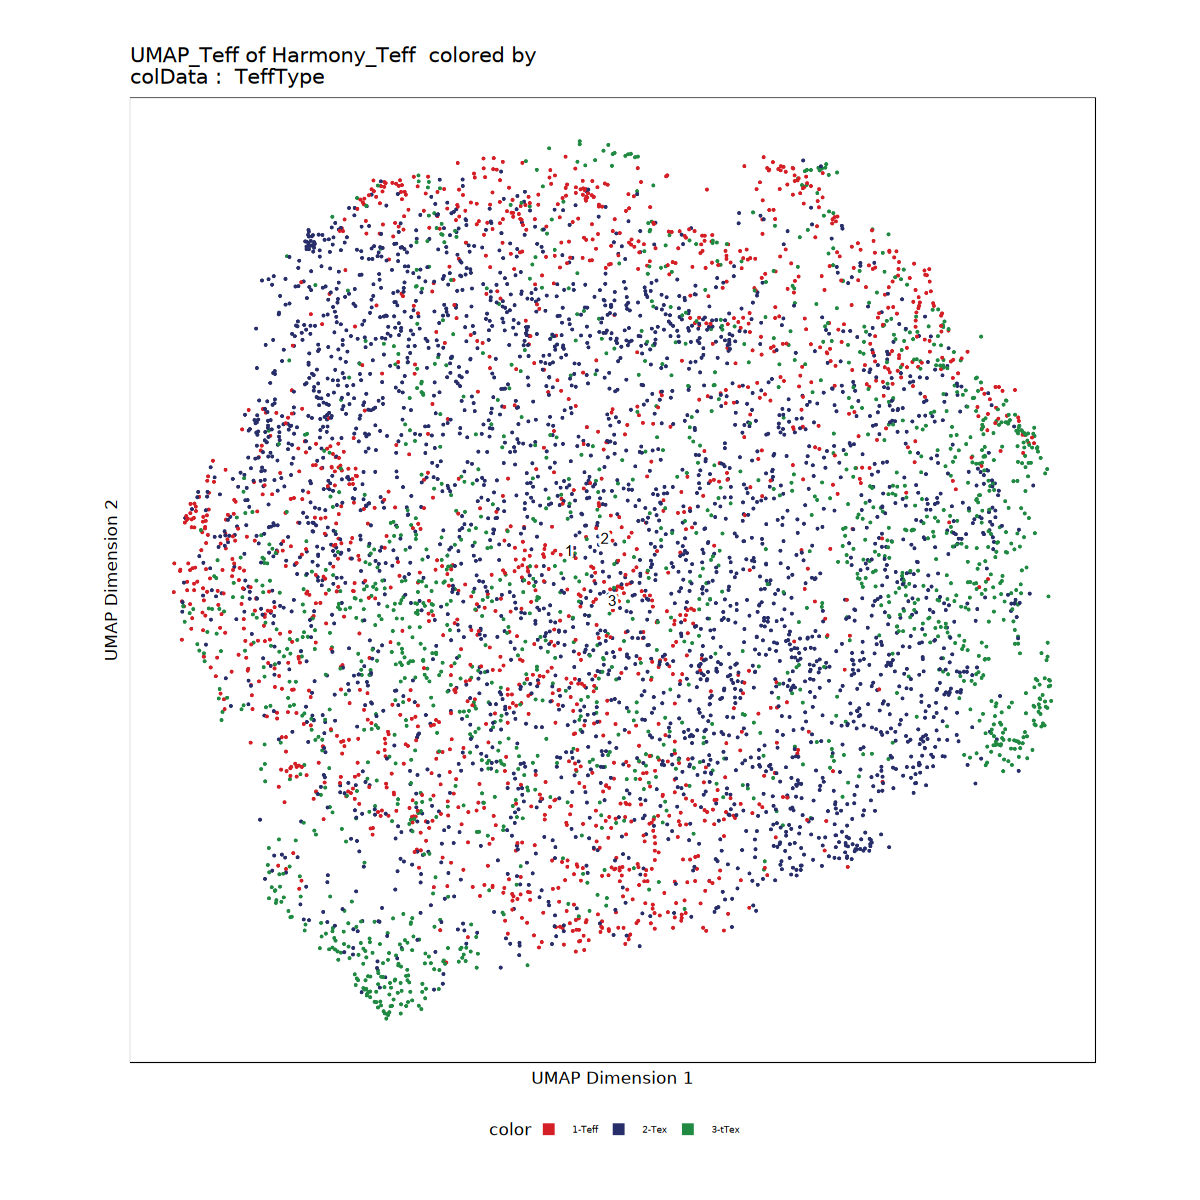

In [30]:
p <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "TeffType", 
    embedding = "UMAP_Teff"
    )
p

In [31]:
new_order <- c(
    "Teff" , "Tex" , "tTex" 
)

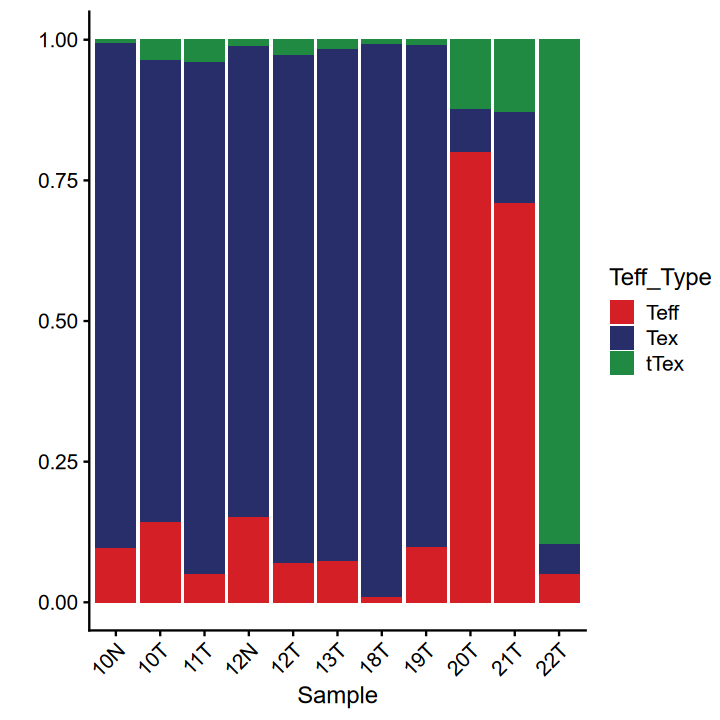

In [32]:
# 计算各样本中细胞类型的比例
sample_cell_type_distribution <- table(proj_sub$Sample, proj_sub$TeffType)
sample_cell_type_distribution <- prop.table(sample_cell_type_distribution, 1)

# 转换为数据框
df_sample <- as.data.frame(sample_cell_type_distribution)
df_sample$Var2 <- factor(df_sample$Var2, levels = new_order)
cols <- ArchR::paletteDiscrete(df_sample$Var2)

# 创建堆叠图
p <- ggplot(df_sample, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = cols) +
  theme_cowplot() +
  xlab("Sample") +
  ylab("") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(fill = "Teff_Type")

options(repr.plot.width = 6, repr.plot.height = 6)
# ggsave("/data/hanxue/BCY_ATAC/joint_output/Sample-CellType-Distribution.svg",plot = p, width = 6, height = 6, device = "svg")
p

In [33]:
# 获取并转换细胞元数据
cell_stats <- getCellColData(proj_sub) %>%
  as.data.frame() %>%
  group_by(Sample, TeffType) %>% 
  summarise(Count = n()) %>%
  tidyr::pivot_wider(names_from = TeffType, values_from = Count, values_fill = 0) %>%
  mutate(Total = rowSums(across(where(is.numeric))))  # 计算所有数值列的总和
# 查看结果
cell_stats

`summarise()` has grouped output by 'Sample'. You can override using the
`.groups` argument.


Sample Teff Tex tTex Total
1  10N     62  568    3  633 
2  10T      4   23    1   28 
3  11T     44  769   33  846 
4  12N     15   82    1   98 
5  12T     16  203    6  225 
6  13T     30  371    6  407 
7  18T      3  291    2  296 
8  19T     43  384    4  431 
9  20T    714   68  109  891 
10 21T    596  136  107  839 
11 22T     76   78 1321 1475

In [34]:
# 检查选定基因的位点可及性
gene_list <- c("IFNG", "PDCD1", "TOX", "HAVCR2", "CD200", "STAT3")

p <- plotBrowserTrack(
    ArchRProj = proj_sub,
    groupBy = "Sample",
    geneSymbol = gene_list, 
    upstream = 50000,
    downstream = 50000
)

plotPDF(p, name = "TeffSample_track",ArchRProj = proj_sub, addDOC = FALSE)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-29a4d7150d5323-Date-2025-04-20_Time-10-16-09.65254.log
If there is an issue, please report to github with logFile!

2025-04-20 10:16:09.789168 : Validating Region, 0.002 mins elapsed.



GRanges object with 6 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr12   68154768-68159747      - |        3458        IFNG
  [2]     chr2 241849881-241858908      - |        5133       PDCD1
  [3]     chr8   58805418-59119208      - |        9760         TOX
  [4]     chr5 157085832-157142869      - |       84868      HAVCR2
  [5]     chr3 112332347-112362812      + |        4345       CD200
  [6]    chr17   42313324-42388568      - |        6774       STAT3
  -------
  seqinfo: 24 sequences from hg38 genome


2025-04-20 10:16:09.920182 : Adding Bulk Tracks (1 of 6), 0.004 mins elapsed.

2025-04-20 10:16:12.405754 : Adding Feature Tracks (1 of 6), 0.046 mins elapsed.

2025-04-20 10:16:12.501803 : Adding Gene Tracks (1 of 6), 0.048 mins elapsed.

2025-04-20 10:16:12.945448 : Plotting, 0.055 mins elapsed.

2025-04-20 10:16:14.736536 : Adding Bulk Tracks (2 of 6), 0.085 mins elapsed.

2025-04-20 10:16:17.408811 : Adding Feature Tracks (2 of 6), 0.129 mins elapsed.

2025-04-20 10:16:17.527071 : Adding Gene Tracks (2 of 6), 0.131 mins elapsed.

2025-04-20 10:16:17.934341 : Plotting, 0.138 mins elapsed.

2025-04-20 10:16:19.788692 : Adding Bulk Tracks (3 of 6), 0.169 mins elapsed.

2025-04-20 10:16:21.930985 : Adding Feature Tracks (3 of 6), 0.205 mins elapsed.

2025-04-20 10:16:22.022875 : Adding Gene Tracks (3 of 6), 0.206 mins elapsed.

2025-04-20 10:16:22.427854 : Plotting, 0.213 mins elapsed.

2025-04-20 10:16:23.854664 : Adding Bulk Tracks (4 of 6), 0.237 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:16:26.024579 : Adding Feature Tracks (4 of 6), 0.273 mins elapsed.

2025-04-20 10:16:26.115735 : Adding Gene Tracks (4 of 6), 0.274 mins elapsed.

2025-04-20 10:16:26.565025 : Plotting, 0.282 mins elapsed.

2025-04-20 10:16:28.228871 : Adding Bulk Tracks (5 of 6), 0.31 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:16:31.097472 : Adding Feature Tracks (5 of 6), 0.357 mins elapsed.

2025-04-20 10:16:31.193999 : Adding Gene Tracks (5 of 6), 0.359 mins elapsed.

2025-04-20 10:16:31.586401 : Plotting, 0.366 mins elapsed.

2025-04-20 10:16:33.246938 : Adding Bulk Tracks (6 of 6), 0.393 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:16:52.985454 : Adding Feature Tracks (6 of 6), 0.722 mins elapsed.

2025-04-20 10:16:53.18968 : Adding Gene Tracks (6 of 6), 0.726 mins elapsed.

2025-04-20 10:16:53.567327 : Plotting, 0.732 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-29a4d7150d5323-Date-2025-04-20_Time-10-16-09.65254.log

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!



In [35]:
# 检查选定基因的位点可及性
gene_list <- c("IFNG", "PDCD1", "TOX", "HAVCR2", "CD200", "STAT3")

p <- plotBrowserTrack(
    ArchRProj = proj_sub,
    groupBy = "neoadjuvant",
    geneSymbol = gene_list, 
    upstream = 50000,
    downstream = 50000
)

plotPDF(p, name = "Teffneoadjuvant_track",ArchRProj = proj_sub, addDOC = FALSE)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-29a4d71416e6bd-Date-2025-04-20_Time-10-16-58.327597.log
If there is an issue, please report to github with logFile!

2025-04-20 10:16:58.45894 : Validating Region, 0.002 mins elapsed.



GRanges object with 6 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr12   68154768-68159747      - |        3458        IFNG
  [2]     chr2 241849881-241858908      - |        5133       PDCD1
  [3]     chr8   58805418-59119208      - |        9760         TOX
  [4]     chr5 157085832-157142869      - |       84868      HAVCR2
  [5]     chr3 112332347-112362812      + |        4345       CD200
  [6]    chr17   42313324-42388568      - |        6774       STAT3
  -------
  seqinfo: 24 sequences from hg38 genome


2025-04-20 10:16:58.588913 : Adding Bulk Tracks (1 of 6), 0.004 mins elapsed.

2025-04-20 10:17:00.655159 : Adding Feature Tracks (1 of 6), 0.039 mins elapsed.

2025-04-20 10:17:00.751245 : Adding Gene Tracks (1 of 6), 0.04 mins elapsed.

2025-04-20 10:17:01.11517 : Plotting, 0.046 mins elapsed.

2025-04-20 10:17:01.757705 : Adding Bulk Tracks (2 of 6), 0.057 mins elapsed.

2025-04-20 10:17:04.117399 : Adding Feature Tracks (2 of 6), 0.097 mins elapsed.

2025-04-20 10:17:04.217404 : Adding Gene Tracks (2 of 6), 0.098 mins elapsed.

2025-04-20 10:17:04.60357 : Plotting, 0.105 mins elapsed.

2025-04-20 10:17:05.318696 : Adding Bulk Tracks (3 of 6), 0.117 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:17:07.425848 : Adding Feature Tracks (3 of 6), 0.152 mins elapsed.

2025-04-20 10:17:07.52233 : Adding Gene Tracks (3 of 6), 0.153 mins elapsed.

2025-04-20 10:17:07.901719 : Plotting, 0.16 mins elapsed.

2025-04-20 10:17:08.459104 : Adding Bulk Tracks (4 of 6), 0.169 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


2025-04-20 10:17:10.462294 : Adding Feature Tracks (4 of 6), 0.202 mins elapsed.

2025-04-20 10:17:10.569013 : Adding Gene Tracks (4 of 6), 0.204 mins elapsed.

2025-04-20 10:17:10.971881 : Plotting, 0.211 mins elapsed.

2025-04-20 10:17:11.664251 : Adding Bulk Tracks (5 of 6), 0.222 mins elapsed.

2025-04-20 10:17:13.847227 : Adding Feature Tracks (5 of 6), 0.259 mins elapsed.

2025-04-20 10:17:13.942155 : Adding Gene Tracks (5 of 6), 0.26 mins elapsed.

2025-04-20 10:17:14.3015 : Plotting, 0.266 mins elapsed.

2025-04-20 10:17:14.909524 : Adding Bulk Tracks (6 of 6), 0.276 mins elapsed.

2025-04-20 10:17:17.202614 : Adding Feature Tracks (6 of 6), 0.315 mins elapsed.

2025-04-20 10:17:17.28841 : Adding Gene Tracks (6 of 6), 0.316 mins elapsed.

2025-04-20 10:17:17.650777 : Plotting, 0.322 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-29a4d71416e6bd-Date-2025-04-20_Time-10-16-58.327597.log

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting 

In [36]:
markerPK <- getMarkerFeatures(
    ArchRProj = proj_sub,
    useMatrix = "PeakMatrix", 
    groupBy = "neoadjuvant",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-29a4d748f03be5-Date-2025-04-20_Time-10-17-20.53913.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Integer.Matrix

2025-04-20 10:17:30.277476 : Matching Known Biases, 0.16 mins elapsed.

###########
2025-04-20 10:23:17.138831 : Completed Pairwise Tests, 5.941 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-29a4d748f03be5-Date-2025-04-20_Time-10-17-20.53913.log



DataFrame with 6 rows and 6 columns
    seqnames       idx              name combinedVars combinedMeans      rank
       <Rle> <integer>       <character>    <numeric>     <numeric> <integer>
f87        z        87 FOXA1.Forkhead_87      68.3331   -0.65523535         1
f86        z        86     Fosl2.bZIP_86      64.1998    0.00507140         2
f1         z         1       AP.1.bZIP_1      63.3041    0.02254696         3
f99        z        99      Fra2.bZIP_99      62.8903    0.00733377         4
f94        z        94 FOXM1.Forkhead_94      62.5174   -0.64134957         5
f88        z        88 FOXA1.Forkhead_88      61.6128   -0.63294138         6


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-29a4d77ebb2974-Date-2025-04-20_Time-10-23-29.552957.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

2025-04-20 10:23:29.764178 : Matching Known Biases, 0.002 mins elapsed.

###########
2025-04-20 10:23:39.076075 : Completed Pairwise Tests, 0.157 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-29a4d77ebb2974-Date-2025-04-20_Time-10-23-29.552957.log

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


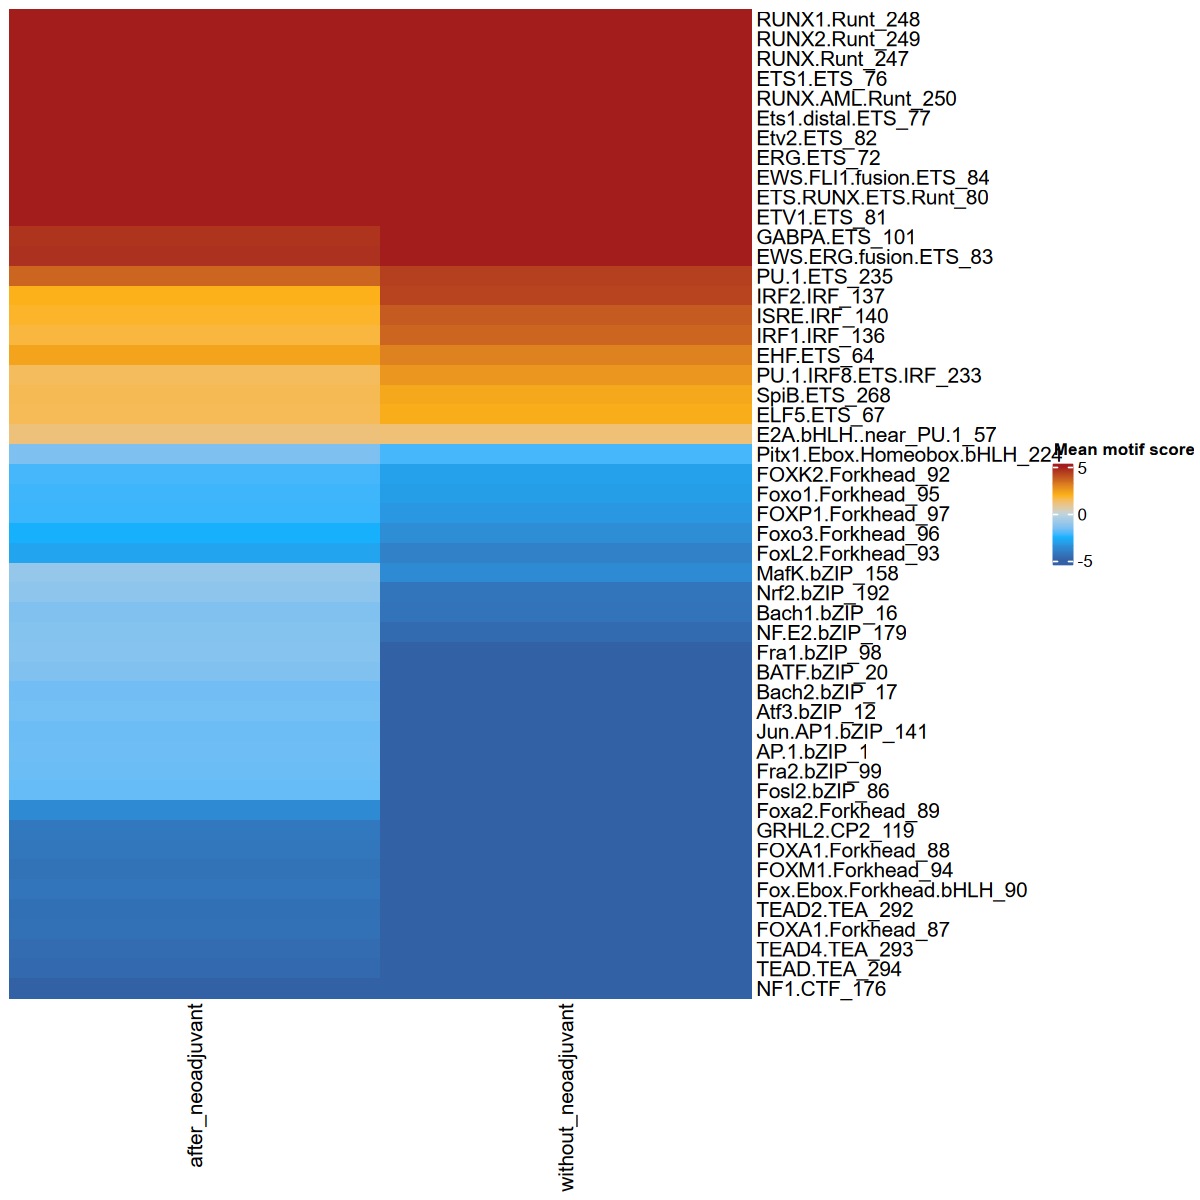

In [37]:
### motif enrichment
VarMotifs <- getVarDeviations(proj_sub, name = "homerMatrix", plot = F)
MotifScoreClusters <- getMarkerFeatures(proj_sub, 
                                        useMatrix = "homerMatrix", 
                                        groupBy = "neoadjuvant",
                                        bias = c("TSSEnrichment", "log10(nFrags)"),
                                        testMethod = "wilcoxon", 
                                        useSeqnames = "z")

fh <- function(x) hclust(dist(x), method="ward.D2")
idy <- which(mcols(MotifScoreClusters)$name %in% VarMotifs$name[c(1:50)])
mtx2 <- assays(MotifScoreClusters[idy,])$Mean %>% `rownames<-`(., mcols(MotifScoreClusters)$name[idy])

col_fun2 <- colorRamp2(c(-5,-2.5,0,2,5), paletteContinuous(set = "solarExtra", n = 5))
ht2 <- Heatmap(mtx2, name = "Mean motif score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun2)
options(repr.plot.width=10, repr.plot.height=10)
p6 <- draw(ht2)

In [38]:
# 差异，motif分析
neoMotif <- getMarkerFeatures(
    ArchRProj = proj_sub,
    useMatrix = "MotifMatrix",
    groupBy = "neoadjuvant",
    useGroups = "without_neoadjuvant", # 前景组
    bgdGroups = "after_neoadjuvant", # 背景组
    testMethod = "wilcoxon",
    bias = c("TSSEnrichment", "log10(nFrags)")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-29a4d766b114fe-Date-2025-04-20_Time-10-23-39.561903.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'deviations'!
If confused, try getSeqnames(ArchRProj, 'MotifMatrix'') to list out available seqnames for input!

2025-04-20 10:23:42.257644 : 

2025-04-20 10:23:42.265536 : Matching Known Biases, 0.043 mins elapsed.

2025-04-20 10:23:42.629887 : Computing Pairwise Tests (1 of 1), 0.049 mins elapsed.

Pairwise Test without_neoadjuvant : Seqnames deviations

###########
2025-04-20 10:24:32.789167 : Completed Pairwise Tests, 0.885 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-29a4d766b114fe-Date-2025-04-20_Time-10-23-39.561903.log



In [39]:
neoMotifResult <- getMarkers(neoMotif, cutOff = "FDR <= 0.05")[[1]]
neoMotifResult <- as.data.frame(neoMotifResult)

In [40]:
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:20)
top5_positive$name

[1] "IRF9_636"   "IRF8_633"   "IRF2_634"   "IRF5_631"   "IRF3_630"  
 [6] "IRF6_628"   "TET1_302"   "MYPOP_652"  "STAT5A_774" "CEBPE_107" 
[11] "CTCF_177"   "IRF7_635"   "STAT5B_779" "STAT2_778"  "E2F5_315"  
[16] "PROX1_712"  "HOMEZ_568"  "NKX28_475"  "IRF1_629"   "NFYA_288"

In [41]:
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:20)
top5_negative$name

[1] "JUN_143"     "JUNB_139"    "FOSL2_105"   "JUND_124"    "FOSL1_142"  
 [6] "FOS_137"     "SMARCC1_651" "BACH2_113"   "JDP2_125"    "BACH1_130"  
[11] "FOSB_121"    "NFE2_119"    "NFE2L2_115"  "BATF_129"    "MAFF_147"   
[16] "RUNX3_731"   "EOMES_788"   "MAFK_149"    "TBX10_791"   "MGA_103"

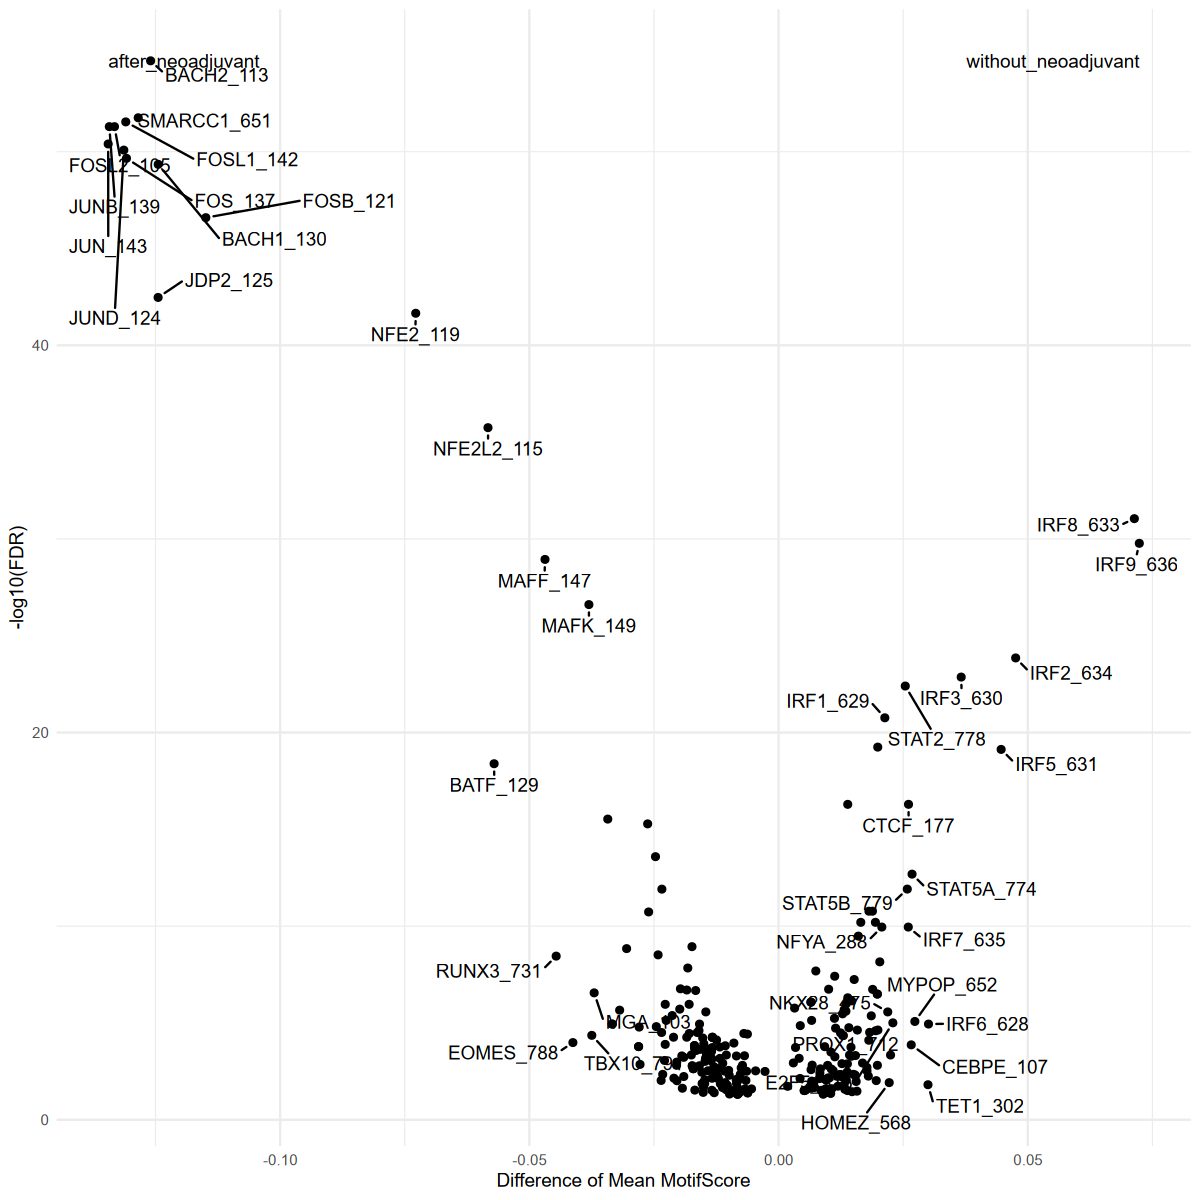

In [42]:
# MeanDiff > 0 表示 without_neoadjuvant 组的得分高于 after_neoadjuvant 组（图中靠右）。
# MeanDiff < 0 表示 after_neoadjuvant 组的得分高于 without_neoadjuvant 组（图中靠左）。
# 基本火山图
p <- ggplot(neoMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 找出 MeanDiff 最大的五个点（正值，右侧）
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:20)

# 找出 MeanDiff 最小的五个点（负值，左侧）
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:20)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_positive, top5_negative)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0, # 强制显示所有连线 
      max.overlaps = 3000

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "after_neoadjuvant", hjust = 0) +
  annotate("text", x = max(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "without_neoadjuvant", hjust = 1)

# 显示图形
print(p)

In [43]:
# TF footprints
motifPositions <- getPositions(ArchRProj = proj_sub)
motifPositions 

GRangesList object of length 332:
$AP.1.bZIP_1
GRanges object with 67738 ranges and 1 metadata column:
          seqnames              ranges strand |     score
             <Rle>           <IRanges>  <Rle> | <numeric>
      [1]     chr1       832379-832388      + |   9.05348
      [2]     chr1       967006-967015      - |   9.04335
      [3]     chr1     1006754-1006763      - |   9.55856
      [4]     chr1     1022065-1022074      + |   8.77324
      [5]     chr1     1022064-1022073      - |   9.14812
      ...      ...                 ...    ... .       ...
  [67734]     chrX 155334754-155334763      + |   9.64631
  [67735]     chrX 155334560-155334569      - |   9.04335
  [67736]     chrX 155334753-155334762      - |   9.55022
  [67737]     chrX 155888402-155888411      + |   9.77651
  [67738]     chrX 155888401-155888410      - |   9.40673
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

...
<331 more elements>

In [104]:
motifs <- c('BATF','BPTF','CBFB','ELF1','FLI1','FOXP3','RUNX1','RUNX3')
markerMotifs <- unlist(lapply(motifs, function(x) grep(x, names(motifPositions), value = TRUE)))
markerMotifs

[1] "IRF.BATF.IRF.bZIP_19"   "BATF.bZIP_20"           "ELF1.ETS_66"           
[4] "EWS.FLI1.fusion.ETS_84" "RUNX1.Runt_248"

In [45]:
proj_sub <- addGroupCoverages(proj_sub, groupBy = "neoadjuvant", force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-29a4d75db1d009-Date-2025-04-20_Time-10-24-36.983269.log
If there is an issue, please report to github with logFile!



Skipping validation of empty chromosomes since `force` = TRUE!

after_neoadjuvant (1 of 2) : CellGroups N = 5

without_neoadjuvant (2 of 2) : CellGroups N = 5

2025-04-20 10:24:38.813635 : Creating Coverage Files!, 0.03 mins elapsed.

2025-04-20 10:24:38.818012 : Batch Execution w/ safelapply!, 0.031 mins elapsed.

2025-04-20 10:24:41.714818 : Group after_neoadjuvant._.11T (1 of 10) : Creating Group Coverage File : after_neoadjuvant._.11T.insertions.coverage.h5, 0.079 mins elapsed.

Number of Cells = 500

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2025-04-20 10:25:59.50672 : Group after_neoadjuvant._.19T (2 of 10) : Creating Group Coverage File : after_neoadjuvant._.19T.insertions.coverage.h5, 1.375 mins elapsed.

Number of Cells = 431

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2025

In [105]:
seFoot <- getFootprints(
    ArchRProj = proj_sub,
    positions = motifPositions[markerMotifs], 
    groupBy = "neoadjuvant"
)

ArchR logging to : ArchRLogs/ArchR-getFootprints-29a4d7d171548-Date-2025-04-20_Time-14-25-53.212476.log
If there is an issue, please report to github with logFile!

2025-04-20 14:25:53.593959 : Computing Kmer Bias Table, 0.006 mins elapsed.

2025-04-20 14:26:14.007659 : Finished Computing Kmer Tables, 0.34 mins elapsed.

2025-04-20 14:26:14.012229 : Computing Footprints, 0.347 mins elapsed.

2025-04-20 14:26:21.354818 : Computing Footprints Bias, 0.469 mins elapsed.

2025-04-20 14:26:26.234106 : Summarizing Footprints, 0.55 mins elapsed.



In [106]:
plotFootprints(
    seFoot = seFoot,
    ArchRProj = proj_sub,
    normMethod = "Subtract",
    plotName = "Teff_Footprints-Subtract-Bias",
    addDOC = FALSE,
    smoothWindow = 5
)

ArchR logging to : ArchRLogs/ArchR-plotFootprints-29a4d737d866b7-Date-2025-04-20_Time-14-26-28.671634.log
If there is an issue, please report to github with logFile!



2025-04-20 14:26:28.780183 : Plotting Footprint : IRF.BATF.IRF.bZIP_19 (1 of 5), 0.002 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-20 14:26:29.493015 : Plotting Footprint : BATF.bZIP_20 (2 of 5), 0.014 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-20 14:26:30.287701 : Plotting Footprint : ELF1.ETS_66 (3 of 5), 0.027 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-20 14:26:30.969721 : Plotting Footprint : EWS.FLI1.fusion.ETS_84 (4 of 5), 0.038 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-20 14:26:31.720287 : Plotting Footprint : RUNX1.Runt_248 (5 of 5), 0.051 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

ArchR logging successful to : A

In [67]:
seTSS <- getFootprints(
  ArchRProj = proj_sub, 
  positions = GRangesList(TSS = getTSS(proj_sub)), 
  groupBy = "neoadjuvant",
  flank = 2000
)

ArchR logging to : ArchRLogs/ArchR-getFootprints-29a4d76e1e1e55-Date-2025-04-20_Time-10-41-30.114036.log
If there is an issue, please report to github with logFile!

2025-04-20 10:41:30.399082 : Computing Kmer Bias Table, 0.005 mins elapsed.

2025-04-20 10:43:07.05694 : Finished Computing Kmer Tables, 1.611 mins elapsed.

2025-04-20 10:43:07.063906 : Computing Footprints, 1.616 mins elapsed.

2025-04-20 10:43:16.357274 : Computing Footprints Bias, 1.771 mins elapsed.

2025-04-20 10:43:20.710533 : Summarizing Footprints, 1.843 mins elapsed.



In [68]:
plotFootprints(
  seFoot = seTSS,
  ArchRProj = proj_sub, 
  normMethod = "None",
  plotName = "TSS-No-Normalization",
  addDOC = FALSE,
  flank = 2000,
  flankNorm = 100
)

ArchR logging to : ArchRLogs/ArchR-plotFootprints-29a4d77b447636-Date-2025-04-20_Time-10-43-22.723975.log
If there is an issue, please report to github with logFile!

2025-04-20 10:43:22.842208 : Plotting Footprint : TSS (1 of 1), 0.002 mins elapsed.

Normalizing by flanking regions

NormMethod = None

ArchR logging successful to : ArchRLogs/ArchR-plotFootprints-29a4d77b447636-Date-2025-04-20_Time-10-43-22.723975.log



In [97]:
seGroupMotif <- getGroupSE(ArchRProj = proj_sub, useMatrix = "MotifMatrix", groupBy = "neoadjuvant")
seGroupMotif

ArchR logging to : ArchRLogs/ArchR-getGroupSE-29a4d779454c63-Date-2025-04-20_Time-14-20-54.655394.log
If there is an issue, please report to github with logFile!



Getting Group Matrix

2025-04-20 14:21:09.851248 : Successfully Created Group Matrix, 0.227 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-29a4d779454c63-Date-2025-04-20_Time-14-20-54.655394.log



class: SummarizedExperiment 
dim: 1740 2 
metadata(0):
assays(1): MotifMatrix
rownames(1740): f1 f2 ... f1739 f1740
rowData names(3): seqnames idx name
colnames(2): after_neoadjuvant without_neoadjuvant
colData names(18): TSSEnrichment ReadsInTSS ... Teff_trajectory nCells

In [98]:
seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]

In [99]:
rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

In [100]:
corGSM_MM <- correlateMatrices(
    ArchRProj = proj_sub,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "Harmony_Teff"
)
corGSM_MM

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-29a4d7366eb04-Date-2025-04-20_Time-14-21-33.884218.log
If there is an issue, please report to github with logFile!



When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatures(ArchRProj, 'MotifMatrix') to list out available seqnames for input!

2025-04-20 14:21:40.585449 : Testing 869 Mappings!, 0.112 mins elapsed.

Warning! Not all requested dimsToUse are available! The follow dims were not found in Harmony_Teff:
30
Unavailable dims will be automatically excluded...

2025-04-20 14:21:40.595144 : Computing KNN, 0.112 mins elapsed.

2025-04-20 14:21:40.771185 : Identifying Non-Overlapping KNN pairs, 0.115 mins elapsed.

2025-04-20 14:21:43.482894 : Identified 500 Groupings!, 0.16 mins elapsed.

2025-04-20 14:21:44.195976 : Getting Group Matrix 1, 0.172 mins elapsed.

2025-04-20 14:22:13.391091 : Getting Group Matrix 2, 0.658 mins elapsed.

Some entries in groupMat2 are less than 0, continuing without Log2 Normalization.
Most likely this assay is a deviations matrix.

Getting Correlations...

2025-04-20 14:2

DataFrame with 869 rows and 14 columns
    GeneScoreMatrix_name MotifMatrix_name        cor        padj        pval
             <character>      <character>  <numeric>   <numeric>   <numeric>
1                   HES4          HES4_95  0.3612619 6.32467e-14 7.35426e-17
2                   HES5          HES5_98  0.0293552 1.00000e+00 5.12532e-01
3                 PRDM16       PRDM16_211 -0.2936277 1.82365e-08 2.12052e-11
4                   TP73         TP73_705 -0.0488456 1.00000e+00 2.75653e-01
5               TP73-AS1         TP73_705 -0.0192140 1.00000e+00 6.68213e-01
...                  ...              ...        ...         ...         ...
865                TFDP3        TFDP3_309 -0.2644893 1.62878e-06 1.89393e-09
866               ZNF75D       ZNF75D_272  0.0686517 1.00000e+00 1.25260e-01
867                 ZIC3         ZIC3_215  0.0346582 1.00000e+00 4.39361e-01
868                 SOX3         SOX3_759  0.1257403 1.00000e+00 4.86584e-03
869                MECP2        MECP2

In [101]:
corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]

In [102]:
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.5 & corGSM_MM$padj < 0.01 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.75))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

[1] "BATF"  "BPTF"  "CBFB"  "ELF1"  "FLI1"  "FOXP3" "RUNX1" "RUNX3"

Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”


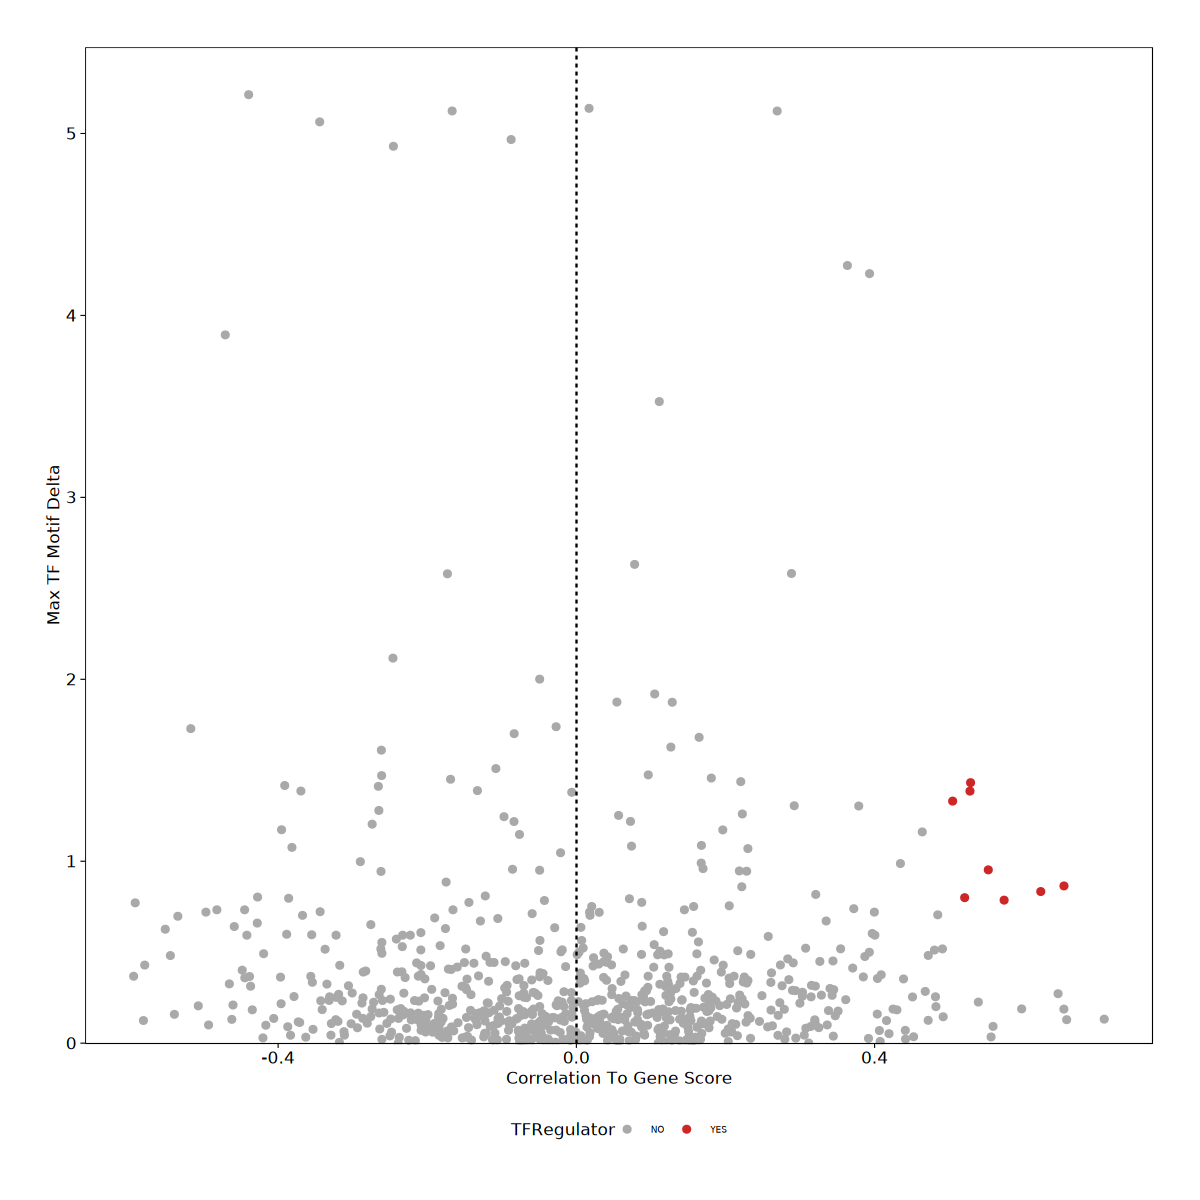

In [103]:
p <- ggplot(data.frame(corGSM_MM), aes(cor, maxDelta, color = TFRegulator)) +
  geom_point() + 
  theme_ArchR() +
  geom_vline(xintercept = 0, lty = "dashed") + 
  scale_color_manual(values = c("NO"="darkgrey", "YES"="firebrick3")) +
  xlab("Correlation To Gene Score") +
  ylab("Max TF Motif Delta") +
  scale_y_continuous(
    expand = c(0,0), 
    limits = c(0, max(corGSM_MM$maxDelta)*1.05)
  )

p
## Warning: Removed 7 rows containing missing values or values outside the scale
## range (`geom_point()`).

In [48]:
# 分化轨迹
proj_sub <- addTrajectory(
  ArchRProj = proj_sub,
  name = "Teff_trajectory",
  groupBy = "TeffType",
  trajectory = c("Teff", "Tex", "tTex"),
  embedding = "UMAP" ,
  force = TRUE
  )

ArchR logging to : ArchRLogs/ArchR-addTrajectory-29a4d725078ab0-Date-2025-04-20_Time-10-40-16.177711.log
If there is an issue, please report to github with logFile!



Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-29a4d725078ab0-Date-2025-04-20_Time-10-40-16.177711.log



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d7484cfde0-Date-2025-04-20_Time-10-40-16.551235.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d7484cfde0-Date-2025-04-20_Time-10-40-16.551235.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-29a4d7a092cb8-Date-2025-04-20_Time-10-40-17.188554.log
If there is an issue, please report to github with logFile!

Plotting

Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-29a4d7a092cb8-Date-2025-04-20_Time-10-40-17.188554.log

Warning message:
“Removed 617 rows containing non-finite outside the scale range
(`stat_summary_hex()`).”


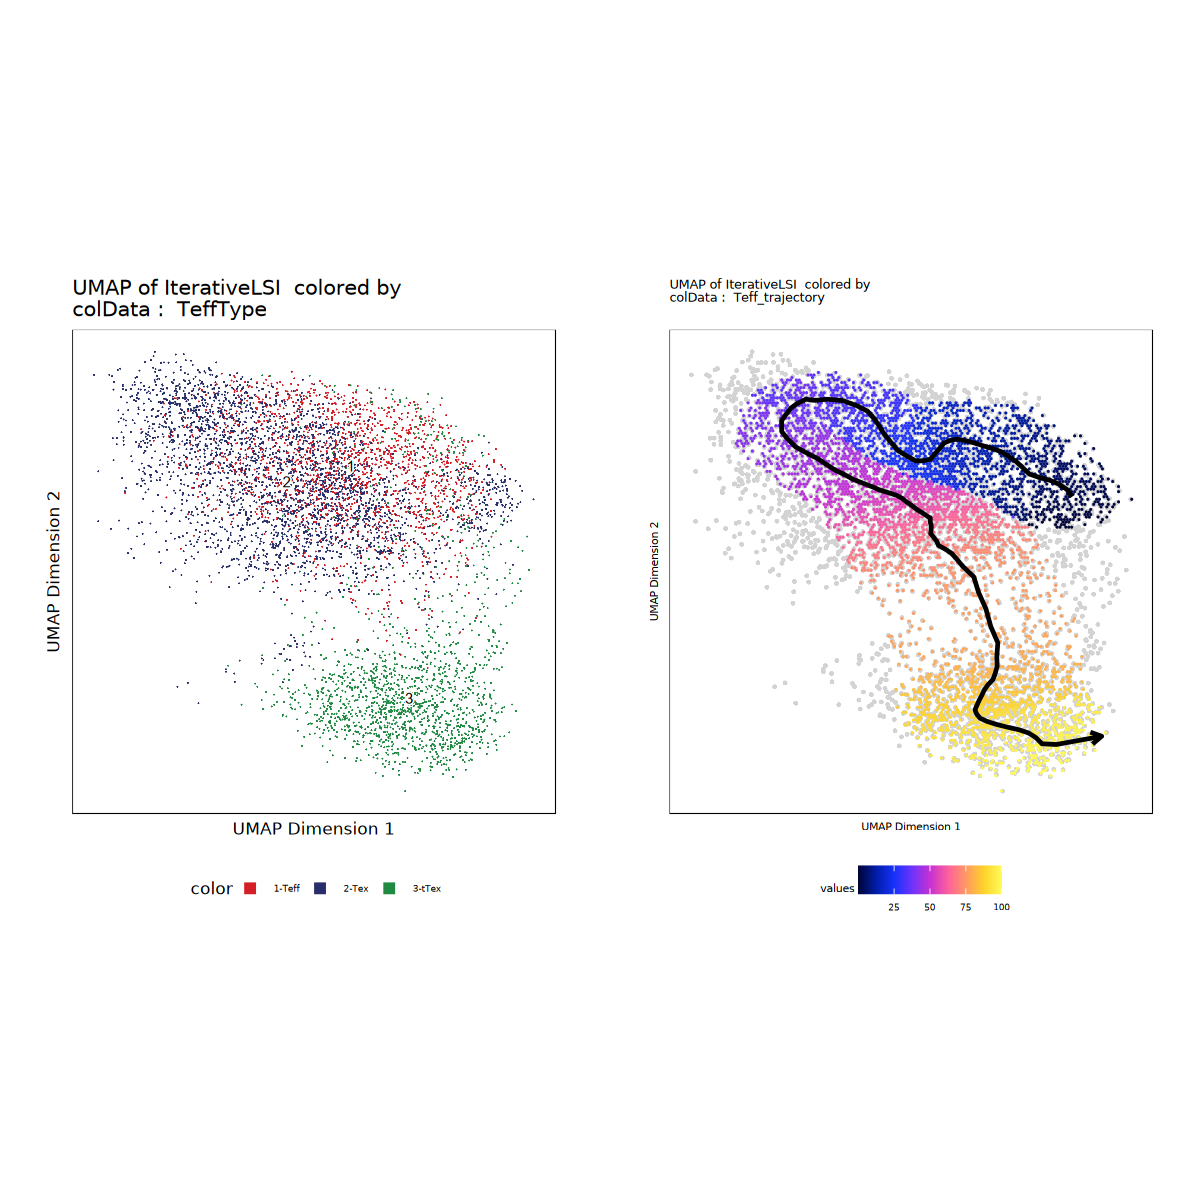

In [49]:
p1 <- plotEmbedding(
    ArchRProj = proj_sub, 
    colorBy = "cellColData", 
    name = "TeffType", 
    embedding = "UMAP"
    )
p2 <- plotTrajectory(
    ArchRProj = proj_sub,
    trajectory = "Teff_trajectory",
    colorBy = "cellColData",
    name = "Teff_trajectory"
    )
# plotPDF(p,name = "Teff_Trajectory", proj_sub, addDOC = FALSE)
ggAlignPlots(p1, p2[[1]], type = "h")

In [50]:
neo_after <- getCellNames(ArchRProj = proj_sub)[proj_sub$neoadjuvant=="after_neoadjuvant"]
proj_after <- proj_sub[neo_after,]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [51]:
neo_without <- getCellNames(ArchRProj = proj_sub)[proj_sub$neoadjuvant=="without_neoadjuvant"]
proj_without <- proj_sub[neo_without,]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [52]:
proj_after <- addTrajectory(
  ArchRProj = proj_after,
  name = "Teff_trajectory",
  groupBy = "TeffType",
  trajectory = c("Teff", "Tex", "tTex"),
  embedding = "UMAP" ,
  force = TRUE
  )

ArchR logging to : ArchRLogs/ArchR-addTrajectory-29a4d727546f73-Date-2025-04-20_Time-10-40-31.88333.log
If there is an issue, please report to github with logFile!



Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

Overriding previous entry for Teff_trajectory

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-29a4d727546f73-Date-2025-04-20_Time-10-40-31.88333.log



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d7ee0d248-Date-2025-04-20_Time-10-40-32.211777.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d7ee0d248-Date-2025-04-20_Time-10-40-32.211777.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-29a4d75808fe64-Date-2025-04-20_Time-10-40-32.834458.log
If there is an issue, please report to github with logFile!

Plotting

Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-29a4d75808fe64-Date-2025-04-20_Time-10-40-32.834458.log

Warning message:
“Removed 201 rows containing non-finite outside the scale range
(`stat_summary_hex()`).”


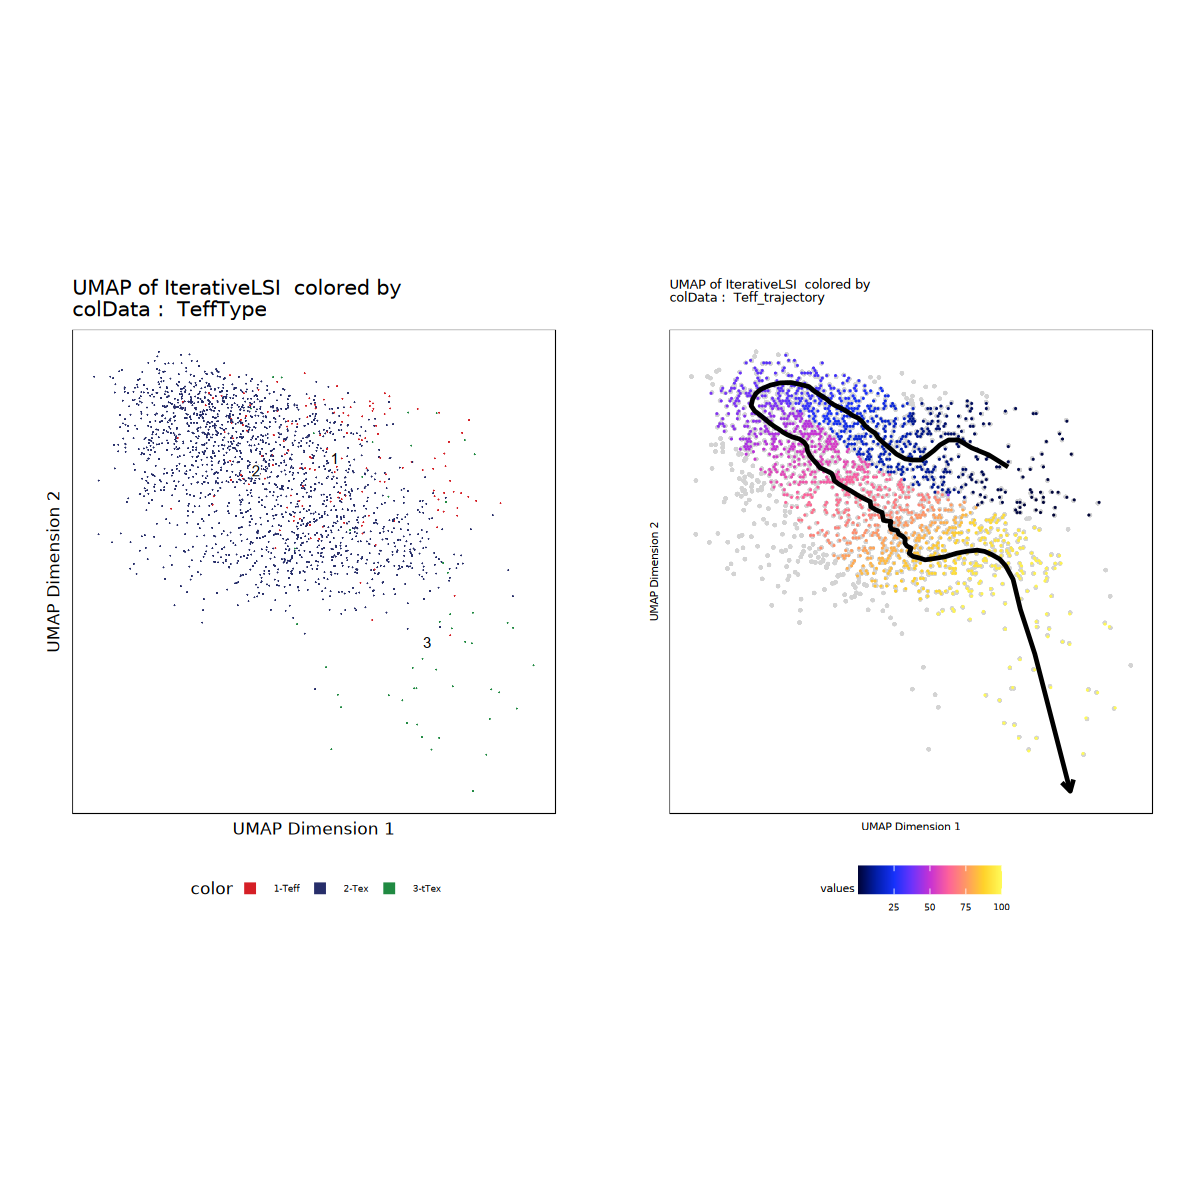

In [53]:
p1 <- plotEmbedding(
    ArchRProj = proj_after, 
    colorBy = "cellColData", 
    name = "TeffType", 
    embedding = "UMAP"
    )
p2 <- plotTrajectory(
    ArchRProj = proj_after,
    trajectory = "Teff_trajectory",
    colorBy = "cellColData",
    name = "Teff_trajectory"
    )
# plotPDF(p,name = "Teff_Trajectory", proj_sub, addDOC = FALSE)
ggAlignPlots(p1, p2[[1]], type = "h")

In [54]:
proj_without <- addTrajectory(
  ArchRProj = proj_without,
  name = "Teff_trajectory",
  groupBy = "TeffType",
  trajectory = c("Teff", "Tex", "tTex"),
  embedding = "UMAP" ,
  force = TRUE
  )

ArchR logging to : ArchRLogs/ArchR-addTrajectory-29a4d779e124c3-Date-2025-04-20_Time-10-40-41.083797.log
If there is an issue, please report to github with logFile!



Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

Overriding previous entry for Teff_trajectory

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-29a4d779e124c3-Date-2025-04-20_Time-10-40-41.083797.log



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-29a4d73a7e51ec-Date-2025-04-20_Time-10-40-41.391301.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-29a4d73a7e51ec-Date-2025-04-20_Time-10-40-41.391301.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-29a4d73d3263fd-Date-2025-04-20_Time-10-40-42.033831.log
If there is an issue, please report to github with logFile!

Plotting

Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-29a4d73d3263fd-Date-2025-04-20_Time-10-40-42.033831.log

Warning message:
“Removed 417 rows containing non-finite outside the scale range
(`stat_summary_hex()`).”


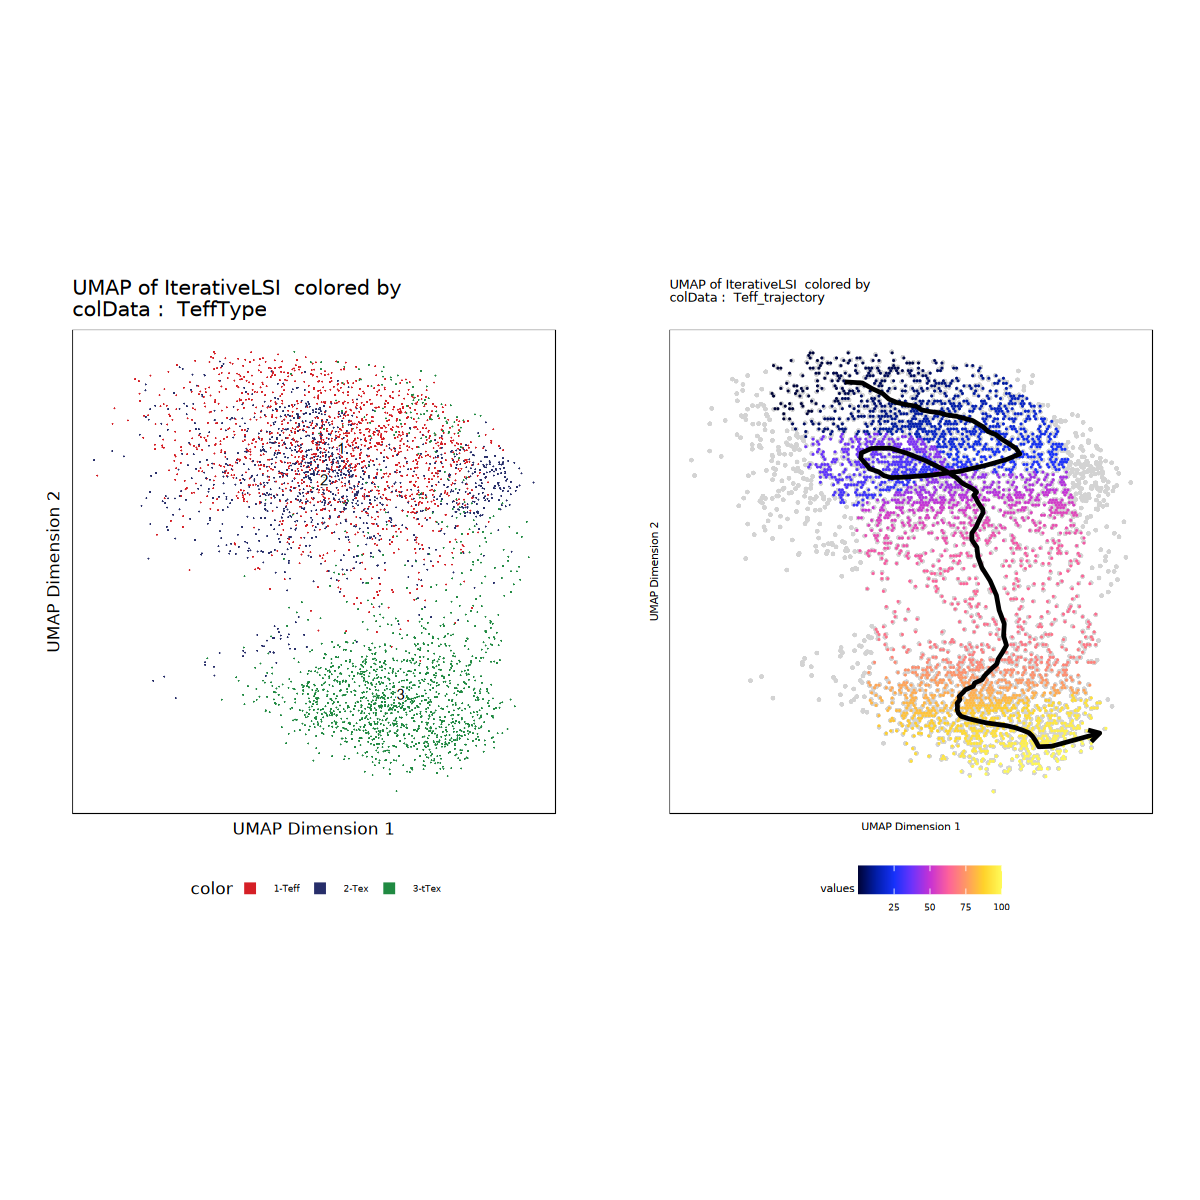

In [55]:
p1 <- plotEmbedding(
    ArchRProj = proj_without, 
    colorBy = "cellColData", 
    name = "TeffType", 
    embedding = "UMAP"
    )
p2 <- plotTrajectory(
    ArchRProj = proj_without,
    trajectory = "Teff_trajectory",
    colorBy = "cellColData",
    name = "Teff_trajectory"
    )
# plotPDF(p,name = "Teff_Trajectory", proj_sub, addDOC = FALSE)
ggAlignPlots(p1, p2[[1]], type = "h")

In [56]:
# 差异，motif分析
neoMotif <- getMarkerFeatures(
    ArchRProj = proj_after,
    useMatrix = "MotifMatrix",
    groupBy = "Sample",
    useGroups = "11T", # 前景组
    bgdGroups = "13T", # 背景组
    testMethod = "wilcoxon",
    bias = c("TSSEnrichment", "log10(nFrags)")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-29a4d77f871c96-Date-2025-04-20_Time-10-40-53.742219.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Assays.Matrix

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'deviations'!
If confused, try getSeqnames(ArchRProj, 'MotifMatrix'') to list out available seqnames for input!

2025-04-20 10:40:54.094699 : 

2025-04-20 10:40:54.101092 : Matching Known Biases, 0.003 mins elapsed.

2025-04-20 10:40:54.877817 : Computing Pairwise Tests (1 of 1), 0.016 mins elapsed.

Pairwise Test 11T : Seqnames deviations

###########
2025-04-20 10:41:01.408707 : Completed Pairwise Tests, 0.125 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-29a4d77f871c96-Date-2025-04-20_Time-10-40-53.742219.log



In [57]:
neoMotifResult <- getMarkers(neoMotif, cutOff = "FDR <= 0.05")[[1]]
neoMotifResult <- as.data.frame(neoMotifResult)

In [58]:
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:10)
top5_positive$name

[1] "NFKB2_714"   "RELA_722"    "FOXA2_355"   "FOXC1_349"   "FOXB2_380"  
 [6] "FOXA1_357"   "ONECUT2_293" "NFKB1_719"   "REL_721"     "HIVEP1_170"

In [59]:
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:10)
top5_negative$name

[1] "RUNX3_731"   "JUNB_139"    "EOMES_788"   "FOS_137"     "JUN_143"    
 [6] "FOSL2_105"   "FOSL1_142"   "SMARCC1_651" "JUND_124"    "RUNX2_732"

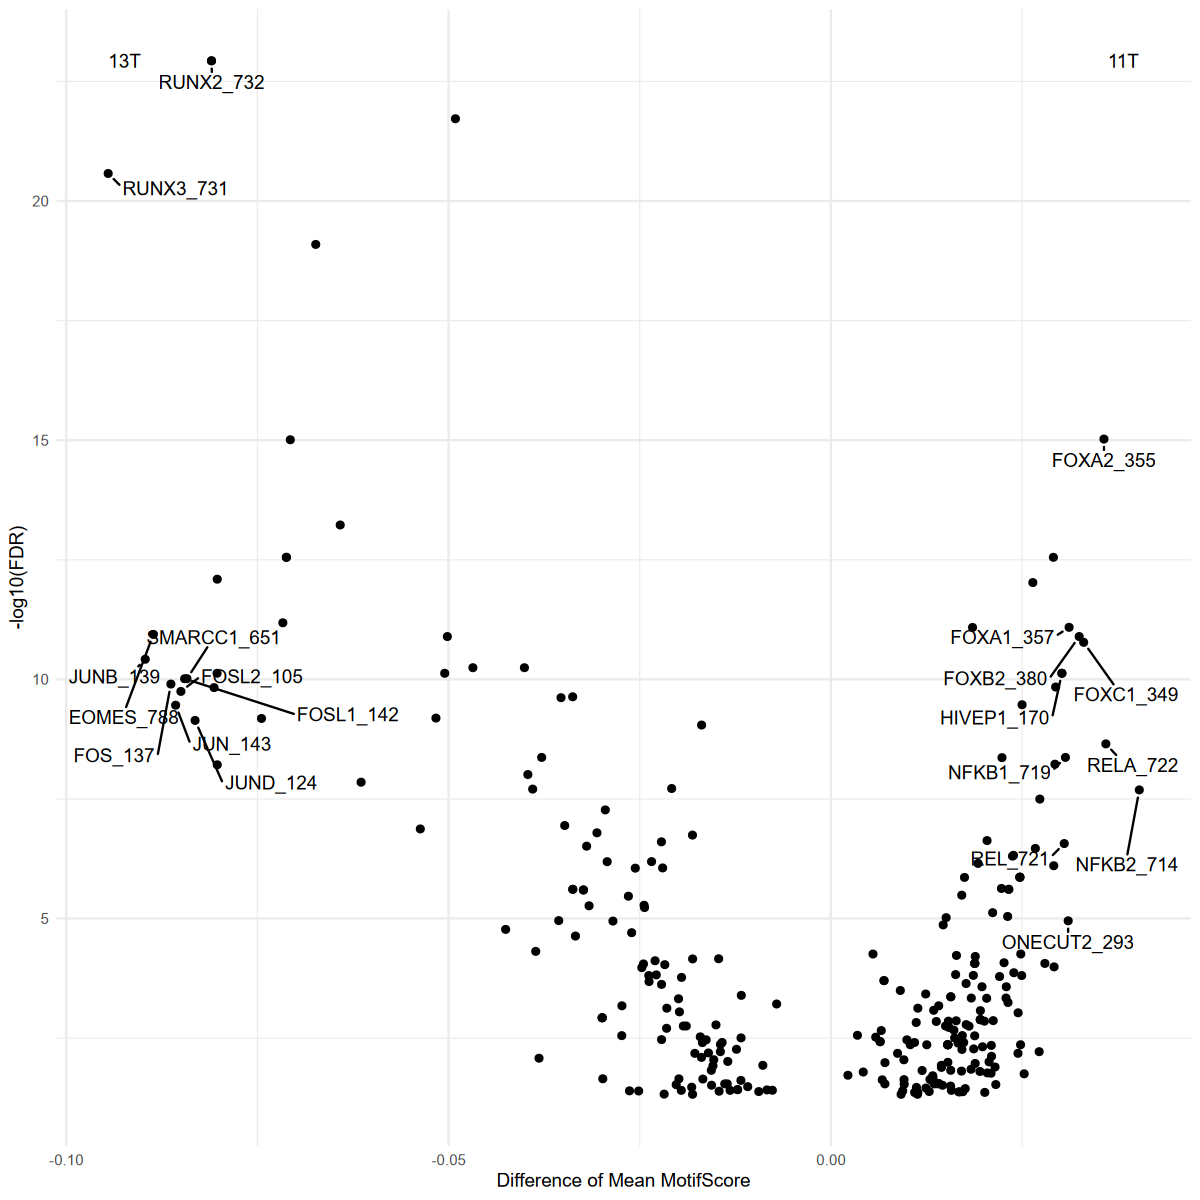

In [60]:
p <- ggplot(neoMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 找出 MeanDiff 最大的五个点（正值，右侧）
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:10)

# 找出 MeanDiff 最小的五个点（负值，左侧）
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:10)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_positive, top5_negative)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0, # 强制显示所有连线 
      max.overlaps = 3000

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "13T", hjust = 0) +
  annotate("text", x = max(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "11T", hjust = 1)

# 显示图形
print(p)

In [61]:
# 差异，motif分析
neoMotif <- getMarkerFeatures(
    ArchRProj = proj_after,
    useMatrix = "MotifMatrix",
    groupBy = "Sample",
    useGroups = c("11T", "12T"), # 前景组
    bgdGroups = c("13T", "19T"), # 背景组
    testMethod = "wilcoxon",
    bias = c("TSSEnrichment", "log10(nFrags)")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-29a4d758791f44-Date-2025-04-20_Time-10-41-02.58289.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'deviations'!
If confused, try getSeqnames(ArchRProj, 'MotifMatrix'') to list out available seqnames for input!

2025-04-20 10:41:02.838758 : 

2025-04-20 10:41:02.843735 : Matching Known Biases, 0.002 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


###########
2025-04-20 10:41:13.15847 : Completed Pairwise Tests, 0.174 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-29a4d758791f44-Date-2025-04-20_Time-10-41-02.58289.log



In [62]:
neoMotifResult <- getMarkers(neoMotif, cutOff = "FDR <= 0.05")[[1]]
neoMotifResult <- as.data.frame(neoMotifResult)

In [63]:
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:10)
top5_positive$name

[1] "E4F1_234"    "ATF2_114"    "ZBED1_816"   "CREB1_117"   "FOXA2_355"  
 [6] "ONECUT2_293" "FOXB2_380"   "ATF1_118"    "NRF1_805"    "FOXA1_357"

In [64]:
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:10)
top5_negative$name

[1] "EOMES_788"           "TBX10_791"           "RUNX3_731"          
 [4] "RUNX2_732"           "ENSG00000250096_734" "TBX5_781"           
 [7] "TBX4_784"            "MGA_103"             "CBFB_801"           
[10] "TBR1_786"

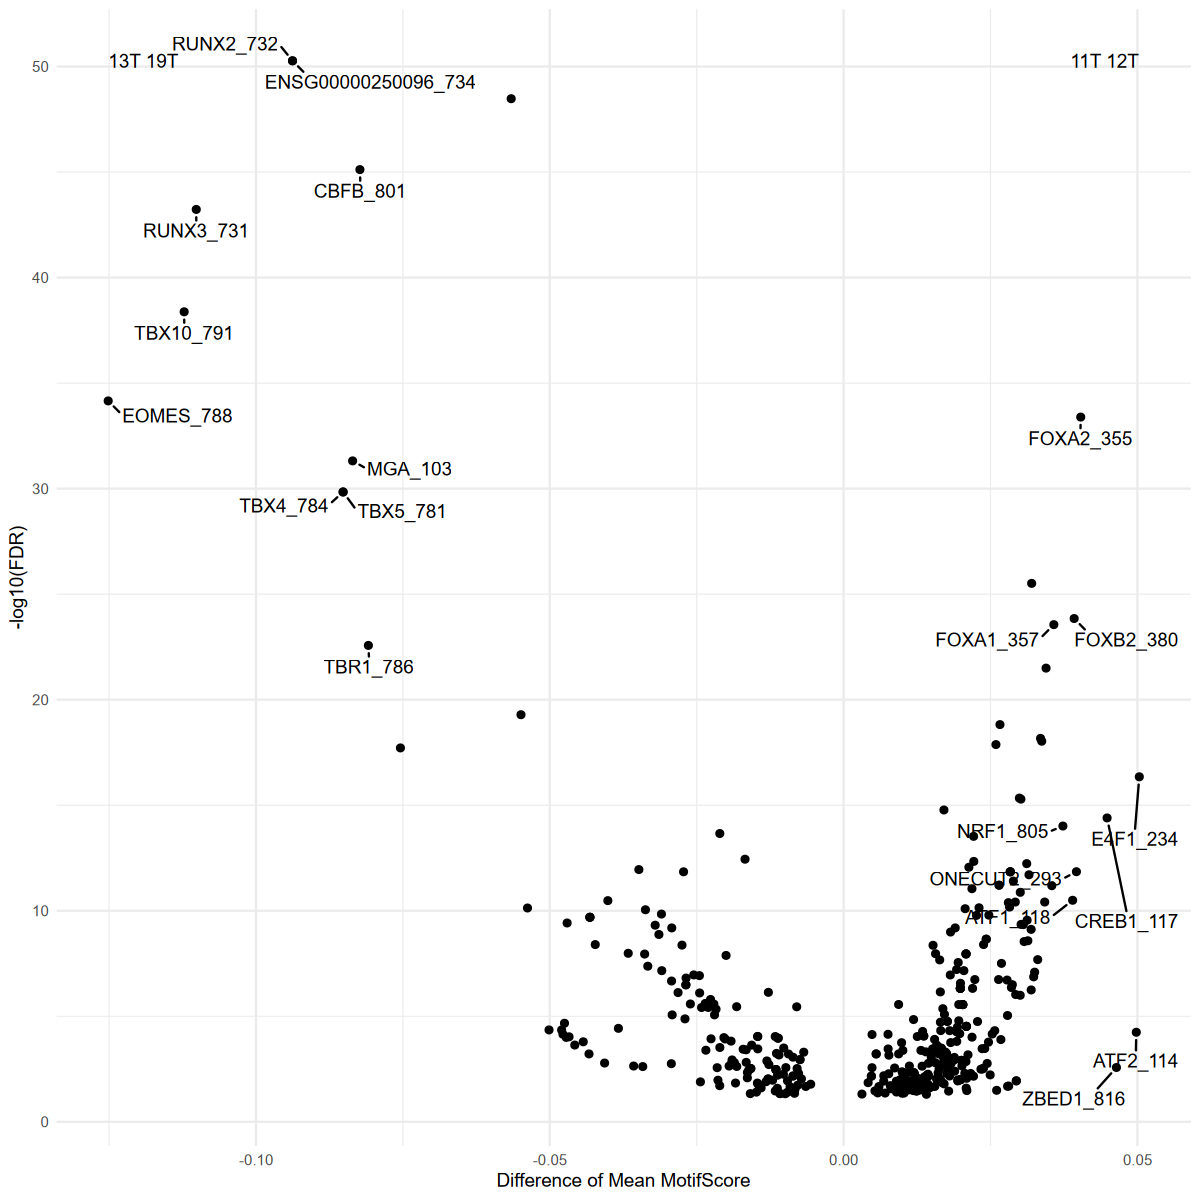

In [65]:
p <- ggplot(neoMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 找出 MeanDiff 最大的五个点（正值，右侧）
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:10)

# 找出 MeanDiff 最小的五个点（负值，左侧）
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:10)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_positive, top5_negative)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0, # 强制显示所有连线 
      max.overlaps = 3000

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "13T 19T", hjust = 0) +
  annotate("text", x = max(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "11T 12T", hjust = 1)

# 显示图形
print(p)

In [66]:
# 保存
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)
sessionInfo()

Saving ArchRProject...



R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] presto_1.0.0                      nabor_0.5.0                      
 [3] circlize_0.4.16                   ComplexHeatmap_2.21.2            
 [5] hexbin_1.28.5    